# Analyse des donn√©es d'√©conomie, emploi et √©ducation avec l'API OCDE

**L'objectif de ce notebook est de r√©aliser une analyse int√©gr√©e des donn√©es sur l'√©conomie, l'emploi et l'√©ducation de l'ann√©e 2021 dans 38 pays de l'OCDE et celle de Br√©sil , charg√© depuis l'API de l'OCDE (Organisation de Coop√©ration et de D√©veloppement √âconomiques). Nous allons proc√©der en plusieurs √©tapes pour nettoyer les donn√©es de chaque domaine et les fusionner ensuite pour obtenir un jeu de donn√©es commun et ainsi les anlayser avec diff√©rents m√©thodes de l'analyse de donn√©e.**

# 1. Chargement des donn√©es de l'api OCDE :


**Pour acc√©der aux donn√©es depuis l'API OCDE, nous utiliserons la biblioth√®que pandas et des requ√™tes HTTP via requests.**

In [ ]:
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

In [ ]:
# URLs des ensembles de donn√©es
education_url = "https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_NF_DIST_FIELD,1.0/BEL+DEU+CHE+ESP+AUS+TUR+SWE+MEX+JPN+IRL+FRA+FIN+DNK+ITA+COL.ISCED11_45+ISCED11_35+ISCED11_746_756_766+ISCED11_5T8+ISCED11_5+ISCED11_6+ISCED11_7+ISCED11_8....F05T07+F00+F01+F02+F03+F04+F05+F06+F07+F08+F09+F10..A....NMOB+MOB..F+M.?startPeriod=2015&endPeriod=2022&dimensionAtObservation=AllDimensions"
emploi_url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_ALFS@DF_ALFS_EMP,1.1/DEU+AUS+AUT+BEL+CHL+CAN+COL+KOR+CRI+DNK+ESP+EST+USA+FIN+FRA+HUN+GRC+IRL+ISL+ITA+JPN+LVA+LTU+LUX+MEX+NOR+NZL+NLD+POL+SVK+PRT+GBR+SVN+SWE+CHE+CZE+TUR+BRA.EMP.PS.N.M+F.Y_GE15._T+ICSE93_5+ICSE93_2T3+ICSE93_1.U+T+S+R+Q+P+O+N+M+L+K+J+I+H+G+GTU+F+E+D+C+B+BTF+A+_T.A?startPeriod=2021&endPeriod=2021&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
data_VAB_url = 'https://sdmx.oecd.org/public/rest/data/OECD.SDD.NAD,DSD_NAMAIN10@DF_TABLE1_OUTPUT,2.0/A.HRV+SAU+CZE+TUR+CHE+SWE+MEX+JPN+ITA+IRL+FRA+FIN+ESP+DNK+COL+BEL+DEU+AUS...B1G+B1GQ..A+C+BTE+F+GTI+J+K+OTQ+M_N+L+RTU+_T..USD_EXC.V..?startPeriod=2015&endPeriod=2022&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
data_IDE_url='https://sdmx.oecd.org/public/rest/data/OECD.DAF.INV,DSD_FDI@DF_FDI_FLOW_IND,1.0/DEU+AUS+AUT+BEL+CAN+CHL+COL+KOR+CRI+DNK+ESP+EST+USA+FIN+FRA+GRC+HUN+IRL+ISL+JPN+LVA+LTU+LUX+MEX+NOR+NZL+NLD+POL+PRT+SVK+GBR+SVN+SWE+CHE+CZE+TUR+ITA.T_FA_F.USD_EXC.DI+DO.NET_FDI.ALL...W.IMC._T+ATUXFPRV+C26+C13T18X15+G45+G46+G47+H49+H50+H51+H52+HX53+H53+J58_62_63+J59_60+J61+K641+K642+K643+K64+K65+K66+M691+M692+M701+M702+M731+M732+M69+M70+M71+M72+M73+M74_75+N79+N77+N78T82+R90+R91+R92_93+S94+S95_96+A_B+_X+E37T39+E36+C30+C303+C29+C28+C263_264+C265_266+C262+C24_25+C22+C21+C20+C19+C16T18+C13_14+C10T12+B06_09+A+B+C+C19T22+C24T28X27+C29_30+C15_23_27_31T33+D+E+F+GTU+G+H+I+J+K+L+M+N+O_T_U+P+Q+R+S+PRV_RE.A.?startPeriod=2021&endPeriod=2021&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
taux_chomage_url='https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP_FIELD,1.0/SWE+IRL+LUX+AUS+AUT+BEL+CHL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+ITA+LVA+LTU+MEX+NLD+NOR+POL+PRT+SVK+SVN+ESP+CHE+TUR+GBR+USA.F+M.Y55T64+Y45T54+Y35T44+Y25T34.ISCED11A_7_8+ISCED11A_6+ISCED11A_5+ISCED11A_5T8.F00_08_10+F05T07+F022T03+F02_03+F01+F02+F03+F04+F05+F06+F07+F08+F09+F10.........OBS...A3?startPeriod=2021&endPeriod=2021&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
taux_emploi_url='https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_FIELD,1.0/SWE+IRL+LUX+AUS+AUT+BEL+CHL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+ITA+LVA+LTU+MEX+NLD+NOR+POL+PRT+SVK+SVN+ESP+CHE+TUR+GBR+USA.F+M.Y25T64.ISCED11A_7_8+ISCED11A_5+ISCED11A_6.F01+F02+F03+F04+F05+F06+F07+F08+F09+F10.........OBS...A3?startPeriod=2021&endPeriod=2021&lastNObservations=1&dimensionAtObservation=AllDimensions'
diffRevenue_url='https://sdmx.oecd.org/public/rest/data/OECD.EDU.IMEP,DSD_EAG_LSO_EA@DF_LSO_EARN_REL_MALE,1.0/LUX+IRL+AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ITA+JPN+KOR+LVA+LTU+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+CHE+TUR+GBR+USA+OECD+ARG+BRA+BGR+PER+ROU..Y25T64.ISCED11A_0T2+ISCED11A_3_4+ISCED11A_5T8.......EMP...OBS.FT..A?startPeriod=2021&endPeriod=2021&lastNObservations=1&dimensionAtObservation=AllDimensions'
# Liste des URLs avec leurs noms de fichier correspondants
urls = [
    {"url": education_url, "filename": "data_education.csv"},
    {"url": emploi_url, "filename": "data_emploi.csv"},
    {"url": data_VAB_url, "filename": "VAB.csv"},
    {"url": data_IDE_url, "filename": "IDE.csv"},
    {"url": taux_chomage_url, "filename": "Taux_Chomage.csv"},
    {"url": diffRevenue_url, "filename": "diffRevenue.csv"},
    {"url": taux_emploi_url, "filename": "taux_emploi.csv"}
]

# En-t√™tes de la requ√™te
headers = {
    'Accept': 'application/vnd.sdmx.data+csv; charset=utf-8'
}

# Fonction pour t√©l√©charger et sauvegarder les donn√©es
def download_data(url, filename):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        with open(filename, 'w', encoding='utf-8') as file:
            file.write(response.text)
        print(f"Le fichier '{filename}' a √©t√© t√©l√©charg√© avec succ√®s.")
    else:
        print(f"Erreur {response.status_code} lors du t√©l√©chargement de {filename}")

# Boucle pour t√©l√©charger chaque jeu de donn√©es
for item in urls:
    download_data(item["url"], item["filename"])


Le fichier 'data_education.csv' a √©t√© t√©l√©charg√© avec succ√®s.
Le fichier 'data_emploi.csv' a √©t√© t√©l√©charg√© avec succ√®s.
Le fichier 'VAB.csv' a √©t√© t√©l√©charg√© avec succ√®s.
Le fichier 'IDE.csv' a √©t√© t√©l√©charg√© avec succ√®s.
Le fichier 'Taux_Chomage.csv' a √©t√© t√©l√©charg√© avec succ√®s.
Le fichier 'diffRevenue.csv' a √©t√© t√©l√©charg√© avec succ√®s.
Le fichier 'taux_emploi.csv' a √©t√© t√©l√©charg√© avec succ√®s.


# **2. Nettoyage des donn√©es :**
## 2.1. les donn√©es de l'√©ducation

*   Cet dataset fournit des informations d√©taill√©es sur les √©tudiants dans l'enseignement sup√©rieur
*   Les dipl√¥m√©s pour chaque domaine d'√©tudes et niveau d'√©tude.
*   Le pourcentage de d√©pense pour le meme domaine et niveau d'√©tude pour chaque pays .



In [ ]:
#afficher les donn√©e avant nettoyage
edu = pd.read_csv("/content/drive/MyDrive/educa2021.csv")
edu.head()

STRUCTURE                                       STRUCTURE_ID  \
0  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...   
1  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...   
2  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...   
3  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...   
4  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_UOE_NON_FIN_STUD@DF_UOE_...   

                                      STRUCTURE_NAME ACTION REF_AREA  \
0  R√©partition des √©l√®ves inscrits, des nouveaux ...      I      JPN   
1  R√©partition des √©l√®ves inscrits, des nouveaux ...      I      KOR   
2  R√©partition des √©l√®ves inscrits, des nouveaux ...      I      JPN   
3  R√©partition des √©l√®ves inscrits, des nouveaux ...      I      JPN   
4  R√©partition des √©l√®ves inscrits, des nouveaux ...      I      GRC   

  Zone de r√©f√©rence EDUCATION_LEV             Niveau d'√©ducation MEASURE  \
0             Japon     ISCED11_7    Niveau master ou √©quivalent    GRAD   
1             Cor√©e     ISCED11_6   Niveau licence ou √©quivalent    GRAD   
2             Japon     ISCED11_7    Niveau master ou √©quivalent    GRAD   
3             Japon     ISCED11_8  Niveau doctorat ou √©quivalent    GRAD   
4             Gr√®ce     ISCED11_8  Niveau doctorat ou √©quivalent    GRAD   

     Mesure  ... CONF_STATUS Statut de confidentialit√© COMMENT_OBS  \
0  Dipl√¥m√©s  ...         NaN                       NaN         NaN   
1  Dipl√¥m√©s  ...         NaN                       NaN         NaN   
2  Dipl√¥m√©s  ...         NaN                       NaN         NaN   
3  Dipl√¥m√©s  ...         NaN                       NaN         NaN   
4  Dipl√¥m√©s  ...         NaN                       NaN         NaN   

  Commentaire d'observation DECIMALS D√©cimales TIME_PER_COLLECT  \
0                       NaN        2       NaN              NaN   
1                       NaN        2       NaN              NaN   
2                       NaN        2       NaN              NaN   
3                       NaN        2       NaN              NaN   
4                       NaN        2       NaN              NaN   

  Collection de p√©riodes de temps UNIT_MULT Multiplicateur d'unit√©  
0                             NaN         0                    NaN  
1                             NaN         0                    NaN  
2                             NaN         0                    NaN  
3                             NaN         0                    NaN  
4                             NaN         0                    NaN  

[5 rows x 58 columns]

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Suppression des colonnes non pertinentes ou redondantes :**

In [ ]:
edu = edu.drop(columns=[
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
     'EDUCATION_LEV', 'MEASURE',
    'Mesure', 'EDUCATION_TYPE', 'Type d\'√©ducation', 'INTENSITY',
  'Intensit√©', 'EDUCATION_FIELD',  'GRADE', 'Classe',
    'FREQ', 'Fr√©quence d\'observation', 'ORIGIN', 'Origine', 'DESTINATION',
    'Unnamed: 23', 'INST_TYPE_EDU', 'Type d\'√©tablissement d\'enseignement',
    'MOBILITY', 'Mobilit√©', 'UNIT_MEASURE', 'Unit√© de mesure',
    'Sexe', 'AGE', '√Çge', 'P√©riode de temps',
    'Valeur d\'observation', 'REF_YEAR_AGES',
    'Date de r√©f√©rence pour les √¢ges', 'ORIGIN_CRITERION',
    'Crit√®re d\'origine', 'REPYEARSTART', 'Ann√©e de r√©f√©rence d√©but',
    'REPYEAREND', 'Ann√©e de r√©f√©rence fin',
    'Statut d\'observation', 'CONF_STATUS', 'Statut de confidentialit√©',
    'COMMENT_OBS', 'Commentaire d\'observation', 'DECIMALS', 'D√©cimales',
    'TIME_PER_COLLECT', 'Collection de p√©riodes de temps','TIME_PERIOD', 'UNIT_MULT',
    'Multiplicateur d\'unit√©','OBS_STATUS'
])
edu.columns
# Afficher les premi√®res lignes du DataFrame apr√®s suppression des colonnes
edu.head()


Zone de r√©f√©rence             Niveau d'√©ducation  \
0             Japon    Niveau master ou √©quivalent   
1             Cor√©e   Niveau licence ou √©quivalent   
2             Japon    Niveau master ou √©quivalent   
3             Japon  Niveau doctorat ou √©quivalent   
4             Gr√®ce  Niveau doctorat ou √©quivalent   

                                   Domaines d‚Äô√©tudes SEX  OBS_VALUE  
0                  Commerce, administration et droit   F        NaN  
1  Ing√©nierie, industries de transformation et co...   M  16.444929  
2            Programmes et certifications g√©n√©riques   M        NaN  
3                        Sant√© et protection sociale   F        NaN  
4      Sciences sociales, journalisme et information   M   0.000000

**Suppression des valeurs manquantes, les doublons et renommage des colonnes : :**

In [ ]:
# V√©rifier les colonnes num√©riques
numerical_columns = edu.select_dtypes(include=['number']).columns

# Remplacer les valeurs nulles uniquement dans les colonnes num√©riques par la moyenne
edu[numerical_columns] = edu[numerical_columns].fillna(edu[numerical_columns].mean())

# Supprimer les doublons
edu = edu.drop_duplicates()

# Renommer les colonnes
edu = edu.rename(columns={
    'SEX': 'Genre',
    'Zone de r√©f√©rence': 'Pays',
    'OBS_VALUE': 'Pourcentage depenses',
    'Domaine d\'√©tudes': 'Domain etude',
    'TIME_PERIOD': 'Annee'
})

# Afficher les premi√®res lignes du DataFrame
edu.head()


Pays             Niveau d'√©ducation  \
0  Japon    Niveau master ou √©quivalent   
1  Cor√©e   Niveau licence ou √©quivalent   
2  Japon    Niveau master ou √©quivalent   
3  Japon  Niveau doctorat ou √©quivalent   
4  Gr√®ce  Niveau doctorat ou √©quivalent   

                                   Domaines d‚Äô√©tudes Genre  \
0                  Commerce, administration et droit     F   
1  Ing√©nierie, industries de transformation et co...     M   
2            Programmes et certifications g√©n√©riques     M   
3                        Sant√© et protection sociale     F   
4      Sciences sociales, journalisme et information     M   

   Pourcentage depenses  
0             17.791047  
1             16.444929  
2             17.791047  
3             17.791047  
4              0.000000

In [ ]:
# Sauvegarder les donn√©es nettoy√©es dans un fichier CSV
edu.to_csv('education_cleaned.csv', index=False)

## 2.1. les donn√©es de l'√©conomie :

##     2.1.1. VAB dataset (Valeur ajout√©e brute) :

- Ce dataset permet d'√©valuer la contribution de chaque secteur ou activit√© √† l'√©conomie globale, pour l'ann√©e 2021.
- La VAB correspond √† la diff√©rence entre la production totale d'un secteur (ou d'une entreprise) et la valeur des consommations interm√©diaires utilis√©es pour produire cette production.
- La valeur de VAB est en Millions USD.

In [ ]:
#afficher les donn√©e avant nettoyage
df = pd.read_csv('VAB.csv')
df.head()

STRUCTURE                                     STRUCTURE_ID  \
0  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0)   
1  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0)   
2  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0)   
3  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0)   
4  DATAFLOW  OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_OUTPUT(2.0)   

                                      STRUCTURE_NAME ACTION FREQ  \
0  PIB annuel et ses composantes selon l'approche...      I    A   
1  PIB annuel et ses composantes selon l'approche...      I    A   
2  PIB annuel et ses composantes selon l'approche...      I    A   
3  PIB annuel et ses composantes selon l'approche...      I    A   
4  PIB annuel et ses composantes selon l'approche...      I    A   

  Fr√©quence d'observation REF_AREA Zone de r√©f√©rence SECTOR  \
0                Annuelle      CHL             Chili     S1   
1                Annuelle      TUR           T√ºrkiye     S1   
2                Annuelle      GRC             Gr√®ce     S1   
3                Annuelle      POL           Pologne     S1   
4                Annuelle      GRC             Gr√®ce     S1   

  Secteur institutionnel  ... CONF_STATUS       Statut de confidentialit√©  \
0        Economie totale  ...           F  Libre (libre pour publication)   
1        Economie totale  ...           F  Libre (libre pour publication)   
2        Economie totale  ...           F  Libre (libre pour publication)   
3        Economie totale  ...           F  Libre (libre pour publication)   
4        Economie totale  ...           F  Libre (libre pour publication)   

  DECIMALS D√©cimales OBS_STATUS Statut d'observation UNIT_MULT  \
0        1       NaN          A                  NaN         6   
1        1       NaN          A                  NaN         6   
2        1       NaN          A                  NaN         6   
3        1       NaN          A                  NaN         6   
4        1       NaN          A                  NaN         6   

  Multiplicateur d'unit√© CURRENCY               Monnaie  
0                    NaN       _Z  N'est pas applicable  
1                    NaN       _Z  N'est pas applicable  
2                    NaN       _Z  N'est pas applicable  
3                    NaN       _Z  N'est pas applicable  
4                    NaN       _Z  N'est pas applicable  

[5 rows x 44 columns]


**Suppression des colonnes inutiles :**



In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
    "Fr√©quence d'observation", 'SECTOR', 'Secteur institutionnel',
    'COUNTERPART_SECTOR', 'Secteur institutionnel de contrepartie',
    'Instruments financiers et actifs non financiers', 'INSTR_ASSET', 'Transaction',
    'Price base', 'TRANSFORMATION', 'PRICE_BASE', 'Type de prix', 'REF_AREA', 'EXPENDITURE',
    'Transformation', 'TABLE_IDENTIFIER', 'ACTIVITY', 'Identifiant de tableau', 'Time period',
    'REF_YEAR_PRICE', "Valeur d'observation", 'Price reference year', 'Statut de confidentialit√©',
    'CONF_STATUS', 'DECIMALS', 'D√©cimales', 'OBS_STATUS', 'Statut d\'observation', 'UNIT_MULT',
    'Multiplicateur d\'unit√©', 'Monnaie', 'CURRENCY', 'D√©pense', 'UNIT_MEASURE', 'Unit√© de mesure'
    ,'Prix ‚Äã‚Äãann√©e de r√©f√©rence','P√©riode temporelle','TRANSACTION','TIME_PERIOD'
]

# Supprimer les colonnes inutiles
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoy√©
df_cleaned.to_csv('VAB_nettoy√©.csv', index=False)


In [ ]:
df_cleaned = pd.read_csv('VAB_nettoy√©.csv')

df_cleaned.head()


Zone de r√©f√©rence                 Activit√© √©conomique   OBS_VALUE
0             Chili        Information et communication    8019.773
1           T√ºrkiye        Information et communication   22928.571
2             Gr√®ce      Total - ensemble des activit√©s  190439.435
3           Pologne  Agriculture, sylviculture et p√™che   15475.476
4             Gr√®ce       Industrie (sauf construction)   28667.351

**V√©rification des valeurs manquantes et renommage des colonnes :**

In [ ]:
print(df_cleaned.isnull().sum())

Zone de r√©f√©rence      0
Activit√© √©conomique    0
OBS_VALUE              0
dtype: int64


In [ ]:
# Renommer les colonnes
df_cleaned = df_cleaned.rename(columns={
    'Zone de r√©f√©rence': 'Pays',
    'TIME_PERIOD': 'annee',
    'Activit√© √©conomique':'Activite economique',
    'OBS_VALUE': 'VAB'
})

# Afficher un aper√ßu des donn√©es avec les nouvelles colonnes
print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('VAB_nettoy√©_renomm√©.csv', index=False)


      Pays                 Activite economique         VAB
0    Chili        Information et communication    8019.773
1  T√ºrkiye        Information et communication   22928.571
2    Gr√®ce      Total - ensemble des activit√©s  190439.435
3  Pologne  Agriculture, sylviculture et p√™che   15475.476
4    Gr√®ce       Industrie (sauf construction)   28667.351


##     2.1.2. IDE dataset (Investissements directs √©trangers) :

Ce dataset porte sur les flux d'investissements directs √©trangers (IDE), ventil√©s par activit√© √©conomique, zone de r√©f√©rence
- Les donn√©es sont exprim√©es en en millions dollars am√©ricains (USD).
- Fr√©quence d'observation : Donn√©es observ√©es annuellement.
- Le principe de mesure peut etre soit : **DO :** Flux d'IDE entrant et sortant
    ou bien **DI :** Flux d'IDE entrant


In [ ]:
df = pd.read_csv('IDE.csv')
df.head()

STRUCTURE                               STRUCTURE_ID  \
0  DATAFLOW  OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0)   
1  DATAFLOW  OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0)   
2  DATAFLOW  OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0)   
3  DATAFLOW  OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0)   
4  DATAFLOW  OECD.DAF.INV:DSD_FDI@DF_FDI_FLOW_IND(1.0)   

                             STRUCTURE_NAME ACTION REF_AREA Zone de r√©f√©rence  \
0  Flux d'IDE par activit√© √©conomique, BMD4      I      AUT          Autriche   
1  Flux d'IDE par activit√© √©conomique, BMD4      I      IRL           Irlande   
2  Flux d'IDE par activit√© √©conomique, BMD4      I      CHE            Suisse   
3  Flux d'IDE par activit√© √©conomique, BMD4      I      PRT          Portugal   
4  Flux d'IDE par activit√© √©conomique, BMD4      I      BEL          Belgique   

  MEASURE                         Mesure UNIT_MEASURE  \
0  T_FA_F  Flux financiers d'IDI - total      USD_EXC   
1  T_FA_F  Flux financiers d'IDI - total      USD_EXC   
2  T_FA_F  Flux financiers d'IDI - total      USD_EXC   
3  T_FA_F  Flux financiers d'IDI - total      USD_EXC   
4  T_FA_F  Flux financiers d'IDI - total      USD_EXC   

                            Unit√© de mesure  ... OBS_STATUS  \
0  Dollars des √â-U, taux de change converti  ...          A   
1  Dollars des √â-U, taux de change converti  ...          A   
2  Dollars des √â-U, taux de change converti  ...          A   
3  Dollars des √â-U, taux de change converti  ...          A   
4  Dollars des √â-U, taux de change converti  ...          A   

  Statut de l'observation UNIT_MULT Multiplicateur d'unit√© CONF_STATUS  \
0                     NaN         6                    NaN           N   
1                     NaN         6                    NaN           C   
2                     NaN         6                    NaN           C   
3                     NaN         6                    NaN           N   
4                     NaN         6                    NaN           C   

  Statut de confidentialit√© CURRENCY                 Monnaie DECIMALS  \
0                       NaN      USD  Dollars des √âtats-Unis        2   
1                       NaN      USD  Dollars des √âtats-Unis        2   
2                       NaN      USD  Dollars des √âtats-Unis        2   
3                       NaN      USD  Dollars des √âtats-Unis        2   
4                       NaN      USD  Dollars des √âtats-Unis        2   

  D√©cimales  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 44 columns]


**Suppression des colonnes inutiles :**



In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'MEASURE',
    'Mesure', 'UNIT_MEASURE', 'Unit√© de mesure', 'ACCOUNTING_ENTRY', 'Ecriture comptable',
    'TYPE_ENTITY', 'Type d\'entit√©', 'FDI_COMP', 'Composant de l\'IDE', 'SECTOR',
    'Secteur institutionnel', 'COUNTERPART_AREA', 'Zone de contrepartie', 'LEVEL_COUNTERPART',
    'FREQ', 'ACTIVITY', 'Niveau de contrepartie', 'LEVEL_COUNTERPART', 'Fr√©quence d\'observation',
    'FDI_COLLECTION_ID', 'Identifiant de collecte des IDE', 'TIME_PERIOD', 'P√©riode temporelle',
    'OBS_STATUS', 'Valeur de l\'observation', 'OBS_STATUS', 'UNIT_MULT', 'Statut de l\'observation',
    'Multiplicateur d\'unit√©', 'CONF_STATUS', 'Statut de confidentialit√©', 'CURRENCY', 'Monnaie',
    'D√©cimales', 'DECIMALS', 'CHAPTER', 'Chapitre', 'Valeur d\'observation', 'Ajustement',
    'COUNTERPART_SECTOR', 'Secteur institutionnel de contrepartie', 'CONSOLIDATION', 'ADJUSTMENT',
    'Secteur institutionnel de contrepartie', 'Statut de consolidation', 'TRANSACTION',
    'INSTR_ASSET', 'PRODUCT', '√âch√©ance initiale et r√©siduelle', 'MATURITY', 'Instruments et actifs',
    'Produit', 'PENSION_FUNDTYPE', 'Type de fond de pension', 'CURRENCY_DENOM',
    'Statut d\'observation', 'P√©riode de base', 'BASE_PER', 'Prix ‚Äã‚Äãann√©e de r√©f√©rence',
    'REF_YEAR_PRICE', 'Identifiant de tableau', 'Transformation', 'TRANSFORMATION', 'Type de prix',
    'PRICE_BASE', 'Evaluation', 'EVALUATION', 'Monnaie de libell√©', 'TABLE_IDENTIFIER', 'VALUATION','Principe de mesure'
]
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoy√©
df_cleaned.to_csv('IDE_nettoy√©.csv', index=False)
df_cleaned.head()

Zone de r√©f√©rence MEASURE_PRINCIPLE  \
0          Autriche                DO   
1           Irlande                DO   
2            Suisse                DO   
3          Portugal                DI   
4          Belgique                DI   

                                 Activit√© √©conomique  OBS_VALUE  
0        Activit√©s de conseils en mati√®re de gestion        NaN  
1                              Activit√©s de location        NaN  
2  Commerce de gros √† l‚Äôexception des v√©hicules a...        NaN  
3             Activit√©s des soci√©t√©s de portefeuille        NaN  
4                                 T√©l√©communications        NaN

**Renommage des colonnes :**


In [ ]:
df_cleaned = df_cleaned.rename(columns={
    'Zone de r√©f√©rence': 'Pays',
    'Activit√© √©conomique': 'Activite economique',
    'OBS_VALUE': 'IDE',
    'MEASURE_PRINCIPLE' : 'Principe de mesure'
    #DO : Principe directionnel-sortant
    #DI : Principe directionnel-entrant
})

# Afficher un aper√ßu des donn√©es avec les nouvelles colonnes
print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('IDE_nettoy√©_Renomm√©.csv', index=False)


       Pays Principe de mesure  \
0  Autriche                 DO   
1   Irlande                 DO   
2    Suisse                 DO   
3  Portugal                 DI   
4  Belgique                 DI   

                                 Activite economique  IDE  
0        Activit√©s de conseils en mati√®re de gestion  NaN  
1                              Activit√©s de location  NaN  
2  Commerce de gros √† l‚Äôexception des v√©hicules a...  NaN  
3             Activit√©s des soci√©t√©s de portefeuille  NaN  
4                                 T√©l√©communications  NaN  


**V√©rifier l'existence de valeurs nulles :**


In [ ]:
print("R√©sum√© des valeurs nulles par colonne :")
print(df_cleaned.isnull().sum())

# V√©rifier si le dataset contient des valeurs nulles
print("\nLe dataset contient-il des valeurs nulles ? :", df_cleaned.isnull().values.any())


R√©sum√© des valeurs nulles par colonne :
Pays                      0
Principe de mesure        0
Activite economique       0
IDE                    1725
dtype: int64

Le dataset contient-il des valeurs nulles ? : True


**Suppression des lignes o√π 'IDE' est vide (NaN) :**

In [ ]:
df_cleaned1 = df_cleaned.dropna(subset=['IDE'])

# V√©rifier le r√©sultat
print("Dataset apr√®s suppression des lignes o√π 'IDE' est vide :")
print(df_cleaned1.head())

# Sauvegarder le dataset nettoy√©
df_cleaned1.to_csv('IDE_final.csv', index=False)


Dataset apr√®s suppression des lignes o√π 'IDE' est vide :
                    Pays Principe de mesure  \
463               France                 DI   
465              Espagne                 DI   
466           Costa Rica                 DI   
467             Pays-Bas                 DO   
468  R√©publique slovaque                 DO   

                                   Activite economique          IDE  
463                       Information et communication  9258.514664  
465     Fabrication de machines et de mat√©riel, n.c.a.   197.492904  
466                 Agriculture, sylviculture et p√™che   -64.366890  
467  Fabrication de m√©taux de base et de produits m...  -314.569536  
468  Activit√©s des agences de voyages, voyagistes, ...     0.000000  


## 2.3. les donn√©es de l'emploi

### 2.3.1 Employ√©es dataset

**Le jeu de donn√©es "Emploi par activit√© et situation professionnelle (ALFS)" pr√©sente des statistiques annuelles sur la population active, ventil√©es par activit√©s √©conomiques et par statut professionnel. Ces donn√©es sont issues des membres de l'OCDE, du Br√©sil. Les mesures concernent les individus √¢g√©s de 15 ans et plus, exprim√©es en milliers de personnes.**

In [ ]:
# Charger le fichier CSV
file_path = 'emploi_data.csv'  # Remplacez par le chemin r√©el du fichier
data = pd.read_csv(file_path)
#afficher les donn√©e avant nettoyage
data.head()


STRUCTURE                            STRUCTURE_ID  \
0  DATAFLOW  OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1)   
1  DATAFLOW  OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1)   
2  DATAFLOW  OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1)   
3  DATAFLOW  OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1)   
4  DATAFLOW  OECD.SDD.TPS:DSD_ALFS@DF_ALFS_EMP(1.1)   

                                      STRUCTURE_NAME ACTION REF_AREA  \
0  Emploi par activit√© et situation profesionnell...      I      SWE   
1  Emploi par activit√© et situation profesionnell...      I      NLD   
2  Emploi par activit√© et situation profesionnell...      I      BEL   
3  Emploi par activit√© et situation profesionnell...      I      ESP   
4  Emploi par activit√© et situation profesionnell...      I      ISL   

  Zone de r√©f√©rence MEASURE  Mesure UNIT_MEASURE Unit√© de mesure  ...  \
0             Su√®de     EMP  Emploi           PS       Personnes  ...   
1          Pays-Bas     EMP  Emploi           PS       Personnes  ...   
2          Belgique     EMP  Emploi           PS       Personnes  ...   
3           Espagne     EMP  Emploi           PS       Personnes  ...   
4           Islande     EMP  Emploi           PS       Personnes  ...   

  OBS_VALUE Valeur d'observation BASE_PER P√©riode de base OBS_STATUS  \
0   135.525                  NaN      NaN             NaN          A   
1    32.000                  NaN      NaN             NaN          A   
2   157.425                  NaN      NaN             NaN          A   
3   809.900                  NaN      NaN             NaN          A   
4     5.975                  NaN      NaN             NaN          A   

  Statut d'observation UNIT_MULT Multiplicateur d'unit√© DECIMALS D√©cimales  
0         Normal value         3              Thousands        0      Zero  
1         Normal value         3              Thousands        0      Zero  
2         Normal value         3              Thousands        0      Zero  
3         Normal value         3              Thousands        0      Zero  
4         Normal value         3              Thousands        0      Zero  

[5 rows x 34 columns]

**Suppression des colonnes redandontes :**

In [ ]:
columns_to_remove = ['MEASURE', 'Sexe', 'AGE', 'FREQ', 'UNIT_MEASURE',
                     'TRANSFORMATION', 'WORKER_STATUS', 'OBS_STATUS',
                     'UNIT_MULT', 'DECIMALS']
data = data.drop(columns=columns_to_remove)

print("Colonnes redondantes supprim√©es.")
data.info()

Colonnes redondantes supprim√©es.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STRUCTURE                1284 non-null   object 
 1   STRUCTURE_ID             1284 non-null   object 
 2   STRUCTURE_NAME           1284 non-null   object 
 3   ACTION                   1284 non-null   object 
 4   REF_AREA                 1284 non-null   object 
 5   Zone de r√©f√©rence        1284 non-null   object 
 6   Mesure                   1284 non-null   object 
 7   Unit√© de mesure          1284 non-null   object 
 8   Transformation           1284 non-null   object 
 9   SEX                      1284 non-null   object 
 10  √Çge                      1284 non-null   object 
 11  Statut des travailleurs  1284 non-null   object 
 12  ACTIVITY                 1284 non-null   object 
 13  Activit√© √©conomique      1284 non-null

**Suppression des colonnes unitiles :**

In [ ]:
columns_to_drop = [
    'P√©riode temporelle', 'Valeur d\'observation',
    'P√©riode de base', 'Statut d\'observation', 'D√©cimales', 'BASE_PER',
    'Multiplicateur d\'unit√©', 'Unit√© de mesure', 'Transformation','STRUCTURE',
    'STRUCTURE_ID','STRUCTURE_NAME','ACTION','REF_AREA',
    '√Çge','Fr√©quence d\'observation','D√©cimales','ACTIVITY','Mesure','TIME_PERIOD'
]
data_cleaned = data.drop(columns=columns_to_drop)

print("Colonnes inutiles supprim√©es.")


Colonnes inutiles supprim√©es.


In [ ]:
display(data_cleaned.head())

Zone de r√©f√©rence SEX Statut des travailleurs  \
0             Su√®de   M                   Total   
1          Pays-Bas   F                   Total   
2          Belgique   F                   Total   
3           Espagne   M                   Total   
4           Islande   M                   Total   

                               Activit√© √©conomique  OBS_VALUE  
0  Activit√©s de services administratifs et d‚Äôappui    135.525  
1                           Activit√©s immobili√®res     32.000  
2  Activit√©s de services administratifs et d‚Äôappui    157.425  
3                         Transport et entreposage    809.900  
4       Activit√©s d‚Äôh√©bergement et de restauration      5.975

**Harmonisation des noms de colonnes pour les rendre plus coh√©rents et compr√©hensibles :**

In [ ]:
# Renommer les colonnes pour harmonisation
data_cleaned = data_cleaned.rename(columns={
    'Zone de r√©f√©rence': 'Pays',
    'SEX': 'Genre',
    'Activit√© √©conomique': 'Activite economique',
    'TIME_PERIOD': 'Annee',
    'OBS_VALUE': 'nbr_employees'
})

print("Noms des colonnes harmonis√©s :")
display(data_cleaned.head())

Noms des colonnes harmonis√©s :


Pays Genre Statut des travailleurs  \
0     Su√®de     M                   Total   
1  Pays-Bas     F                   Total   
2  Belgique     F                   Total   
3   Espagne     M                   Total   
4   Islande     M                   Total   

                               Activite economique  nbr_employees  
0  Activit√©s de services administratifs et d‚Äôappui        135.525  
1                           Activit√©s immobili√®res         32.000  
2  Activit√©s de services administratifs et d‚Äôappui        157.425  
3                         Transport et entreposage        809.900  
4       Activit√©s d‚Äôh√©bergement et de restauration          5.975

Les Variables :                                                                                 
Pays : Indique le pays auquel les donn√©es se rapportent.                                                               
Genre : Sp√©cifie le genre des individus repr√©sent√©s dans les donn√©es.                                                               
Statut des travailleurs : D√©signe la situation professionnelle des travailleurs.                                                               
Activite economique : Repr√©sente le secteur ou l'activit√© √©conomique dans lequel les individus travaillent.                                  
nbr_employees : Nombre total d'employ√©s dans une activit√© √©conomique sp√©cifique et pour un statut professionnel donn√©, exprim√© en milliers de personnes.

**Suppression des doublons :**

In [ ]:
# Supprimer les doublons
data_cleaned = data_cleaned.drop_duplicates()

print("Doublons supprim√©s.")

Doublons supprim√©s.


**V√©rification des valeurs aberrantes :**

Nous analysons les statistiques descriptives des donn√©es num√©riques pour identifier les valeurs aberrantes.

In [ ]:
# Statistiques descriptives des valeurs d'observation
observation_stats = data_cleaned['nbr_employees'].describe()
print("Statistiques descriptives des valeurs d'observation :")
print(observation_stats)

Statistiques descriptives des valeurs d'observation :
count     1284.000000
mean      1669.882486
std       5855.703503
min          0.000000
25%         34.631250
50%        156.262500
75%        880.739000
max      80829.000000
Name: nbr_employees, dtype: float64


**Harmonisation des valeurs textuelles pour les colonnes cat√©goriques :**


In [ ]:
# Remplacer les valeurs dans la colonne 'Statut des travailleurs'
if 'Statut des travailleurs' in data_cleaned.columns:
    data_cleaned['Statut des travailleurs'] = data_cleaned['Statut des travailleurs'].replace('Total', 'Tous')
    print("Les valeurs 'Total' dans la colonne 'Statut des travailleurs' ont √©t√© remplac√©es par 'Tous'.")
else:
    print("La colonne 'Statut des travailleurs' n'existe pas dans le dataset.")

# Remplacer les valeurs dans la colonne 'Activite economique'
if 'Activite economique' in data_cleaned.columns:
    data_cleaned['Activite economique'] = data_cleaned['Activite economique'].replace('Total - ensemble des activit√©s', 'toutes activit√©s')
    print("Les valeurs 'Total - toutes activit√©s' dans la colonne 'Activite economique' ont √©t√© remplac√©es par 'toutes activit√©s'.")
else:
    print("La colonne 'Activite economique' n'existe pas dans le dataset.")



Les valeurs 'Total' dans la colonne 'Statut des travailleurs' ont √©t√© remplac√©es par 'Tous'.
Les valeurs 'Total - toutes activit√©s' dans la colonne 'Activite economique' ont √©t√© remplac√©es par 'toutes activit√©s'.


**Conversion des types de donn√©es pour optimiser l'analyse :**


In [ ]:
# V√©rifier les types actuels
print("Types de donn√©es avant conversion :")
print(data_cleaned.dtypes)

# Conversion des types
data_cleaned['Pays'] = data_cleaned['Pays'].astype('category')
data_cleaned['Genre'] = data_cleaned['Genre'].astype('category')
data_cleaned['Statut des travailleurs'] = data_cleaned['Statut des travailleurs'].astype('category')
data_cleaned['Activite economique'] = data_cleaned['Activite economique'].astype('category')
data_cleaned['nbr_employees'] = data_cleaned['nbr_employees'].astype(float)  # Si des d√©cimales sont possibles

# V√©rifier les types apr√®s conversion
print("\nTypes de donn√©es apr√®s conversion :")
print(data_cleaned.dtypes)


Types de donn√©es avant conversion :
Pays                        object
Genre                       object
Statut des travailleurs     object
Activite economique         object
nbr_employees              float64
dtype: object

Types de donn√©es apr√®s conversion :
Pays                       category
Genre                      category
Statut des travailleurs    category
Activite economique        category
nbr_employees               float64
dtype: object


In [ ]:
# Exporter les donn√©es nettoy√©es
output_path = 'emploi_data_cleaned.csv'
data_cleaned.to_csv(output_path, index=False)
data_cleaned.head()

Pays Genre Statut des travailleurs  \
0     Su√®de     M                    Tous   
1  Pays-Bas     F                    Tous   
2  Belgique     F                    Tous   
3   Espagne     M                    Tous   
4   Islande     M                    Tous   

                               Activite economique  nbr_employees  
0  Activit√©s de services administratifs et d‚Äôappui        135.525  
1                           Activit√©s immobili√®res         32.000  
2  Activit√©s de services administratifs et d‚Äôappui        157.425  
3                         Transport et entreposage        809.900  
4       Activit√©s d‚Äôh√©bergement et de restauration          5.975

### 2.3.2 Taux d'emploi dataset :


Ce dataset fournit des informations sur le taux d'emploi selon :
          

*   le niveau d'√©tude  .
*   le domaine d'√©tude.
*   les groupes d'age et le genre selon diff√©rents pays








In [ ]:
import pandas as pd
# Charger le fichier CSV
tauxEmploi = pd.read_csv("/content/drive/MyDrive/tauxEmp2021.csv")
tauxEmploi.head()

STRUCTURE                                       STRUCTURE_ID  \
0  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...   
1  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...   
2  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...   
3  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...   
4  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_EMP_F...   

                                      STRUCTURE_NAME ACTION REF_AREA  \
0  Taux d'emploi des adultes dipl√¥m√©s de l'enseig...      I      GBR   
1  Taux d'emploi des adultes dipl√¥m√©s de l'enseig...      I      AUT   
2  Taux d'emploi des adultes dipl√¥m√©s de l'enseig...      I      NLD   
3  Taux d'emploi des adultes dipl√¥m√©s de l'enseig...      I      NLD   
4  Taux d'emploi des adultes dipl√¥m√©s de l'enseig...      I      EST   

  Zone de r√©f√©rence SEX           Sexe     AGE             √Çge  ...  \
0       Royaume-Uni   M  Sexe masculin  Y25T34  De 25 √† 34 ans  ...   
1          Autriche   F   Sexe f√©minin  Y55T64  De 55 √† 64 ans  ...   
2          Pays-Bas   F   Sexe f√©minin  Y35T44  De 35 √† 44 ans  ...   
3          Pays-Bas   F   Sexe f√©minin  Y45T54  De 45 √† 54 ans  ...   
4           Estonie   M  Sexe masculin  Y55T64  De 55 √† 64 ans  ...   

   OBS_VALUE Valeur d'observation OBS_STATUS Statut d'observation CONF_STATUS  \
0        NaN                  NaN          O                  NaN         NaN   
1        NaN                  NaN          O                  NaN         NaN   
2        NaN                  NaN          O                  NaN         NaN   
3  81.568626                  NaN          A                  NaN         NaN   
4        NaN                  NaN          O                  NaN         NaN   

  Statut de confidentialit√© UNIT_MULT Multiplicateur d'unit√©s DECIMALS  \
0                       NaN         0                     NaN        1   
1                       NaN         0                     NaN        1   
2                       NaN         0                     NaN        1   
3                       NaN         0                     NaN        1   
4                       NaN         0                     NaN        1   

  D√©cimales  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 50 columns]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Suppression des colonnes inutiles**

In [ ]:
# Supprimer les colonnes inutiles
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
     'Sexe', 'AGE','ATTAINMENT_LEV',
     'EDUCATION_FIELD', 'MEASURE',
    'Mesure', 'INCOME', 'Revenu', 'BIRTH_PLACE', 'Lieu de naissance',
    'MIGRATION_AGE', '√Çge au moment de la migration', 'EDU_STATUS',
    'Situation de scolarisation', 'LABOUR_FORCE_STATUS',
    'Situation d\'activit√©', 'DURATION_UNEMP', 'Dur√©e du ch√¥mage',
    'UNIT_MEASURE', 'Unit√© de mesure', 'STATISTICAL_OPERATION',
    'Op√©ration statistique', 'WORK_TIME_ARNGMNT',
    'Am√©nagement du temps de travail', 'QUESTIONNAIRE',
    'Nom du questionnaire', 'FREQ', 'Fr√©quence d\'observation',
    'TIME_PERIOD', 'Unnamed: 39', 'Valeur d\'observation',
    'OBS_STATUS', 'Statut d\'observation', 'CONF_STATUS',
    'Statut de confidentialit√©', 'UNIT_MULT', 'Multiplicateur d\'unit√©s',
    'DECIMALS', 'D√©cimales'
]

# V√©rifier si les colonnes existent avant de les supprimer pour √©viter les erreurs
colonnes_existantes = [col for col in colonnes_a_supprimer if col in tauxEmploi.columns]
tauxEmploi = tauxEmploi.drop(columns=colonnes_existantes)



# Renommer les colonnes restantes si elles existent
colonnes_a_renommer = {
    'Zone de r√©f√©rence': 'Pays',
    'OBS_VALUE': 'taux emploi',
    '√Çge':'Age',
    'SEX':'Genre',
    'Niveau de scolarit√©': 'Niveau de scolarite',
    'Domaine d‚Äô√©tudes': 'Domaine etudes'
}

# V√©rifier si les colonnes √† renommer existent
colonnes_existantes_renommage = {k: v for k, v in colonnes_a_renommer.items() if k in tauxEmploi.columns}
tauxEmploi = tauxEmploi.rename(columns=colonnes_existantes_renommage)

# Afficher un aper√ßu des donn√©es
tauxEmploi.head()


Pays Genre             Age                    Niveau de scolarite  \
0  Royaume-Uni     M  De 25 √† 34 ans  Enseignement tertiaire de cycle court   
1     Autriche     F  De 55 √† 64 ans           Niveau licence ou √©quivalent   
2     Pays-Bas     F  De 35 √† 44 ans  Enseignement tertiaire de cycle court   
3     Pays-Bas     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   
4      Estonie     M  De 55 √† 64 ans  Enseignement tertiaire de cycle court   

                                      Domaine etudes  taux emploi  
0                        Sant√© et protection sociale          NaN  
1                           Services (grand domaine)          NaN  
2  Technologies de l‚Äôinformation et de la communi...          NaN  
3  Sciences, technologie, ing√©nierie et math√©mati...    81.568626  
4      Sciences sociales, journalisme et information          NaN

**Suppression des doublons et remplacer des valeurs manquantes par les moyennes**

In [ ]:
# V√©rifier les colonnes num√©riques
numerical_columns = tauxEmploi .select_dtypes(include=['number']).columns

# Remplacer les valeurs nulles uniquement dans les colonnes num√©riques par la moyenne
tauxEmploi[numerical_columns] = tauxEmploi [numerical_columns].fillna(tauxEmploi [numerical_columns].mean())

# Supprimer les doublons
tauxEmploi  = tauxEmploi .drop_duplicates()

tauxEmploi.head()


Pays Genre             Age                    Niveau de scolarite  \
0  Royaume-Uni     M  De 25 √† 34 ans  Enseignement tertiaire de cycle court   
1     Autriche     F  De 55 √† 64 ans           Niveau licence ou √©quivalent   
2     Pays-Bas     F  De 35 √† 44 ans  Enseignement tertiaire de cycle court   
3     Pays-Bas     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   
4      Estonie     M  De 55 √† 64 ans  Enseignement tertiaire de cycle court   

                                      Domaine etudes  taux emploi  
0                        Sant√© et protection sociale    85.427044  
1                           Services (grand domaine)    85.427044  
2  Technologies de l‚Äôinformation et de la communi...    85.427044  
3  Sciences, technologie, ing√©nierie et math√©mati...    81.568626  
4      Sciences sociales, journalisme et information    85.427044

In [ ]:
# Sauvegarder les donn√©es nettoy√©es dans un fichier CSV
tauxEmploi.to_csv('tauxEmploiClean.csv', index=False)

### 2.3.3 Taux de chomage dataset

**Le jeu de donn√©es "Taux de ch√¥mage des adultes dipl√¥m√©s de l'enseignement sup√©rieur" fournit des informations sur le taux de ch√¥mage des adultes ayant obtenu un dipl√¥me de l'enseignement sup√©rieur. Les donn√©es sont ventil√©es par domaine d'√©tudes, niveau d'√©tudes, groupe d'√¢ge et sexe.**

**Importation des biblioth√®ques et chargement des donn√©es**

In [ ]:
# Importer les biblioth√®ques n√©cessaires
import pandas as pd

# Charger le fichier CSV
file_path = 'Taux_Chomage.csv'  # Remplacez par le chemin r√©el du fichier
data = pd.read_csv(file_path)

# Afficher les premi√®res lignes et les informations g√©n√©rales
print("Aper√ßu des premi√®res lignes :")
display(data.head())
print("\nInformations g√©n√©rales :")
data.info()


Aper√ßu des premi√®res lignes :


STRUCTURE                                       STRUCTURE_ID  \
0  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...   
1  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...   
2  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...   
3  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...   
4  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_UNEMP...   

                                      STRUCTURE_NAME ACTION REF_AREA  \
0  Taux de ch√¥mage des adultes dipl√¥m√©s de l'ense...      I      CHE   
1  Taux de ch√¥mage des adultes dipl√¥m√©s de l'ense...      I      FRA   
2  Taux de ch√¥mage des adultes dipl√¥m√©s de l'ense...      I      LTU   
3  Taux de ch√¥mage des adultes dipl√¥m√©s de l'ense...      I      POL   
4  Taux de ch√¥mage des adultes dipl√¥m√©s de l'ense...      I      BEL   

  Zone de r√©f√©rence SEX           Sexe     AGE             √Çge  ... OBS_VALUE  \
0            Suisse   F   Sexe f√©minin  Y45T54  De 45 √† 54 ans  ...       NaN   
1            France   F   Sexe f√©minin  Y55T64  De 55 √† 64 ans  ...       NaN   
2          Lituanie   F   Sexe f√©minin  Y45T54  De 45 √† 54 ans  ...       NaN   
3           Pologne   M  Sexe masculin  Y35T44  De 35 √† 44 ans  ...       NaN   
4          Belgique   M  Sexe masculin  Y25T34  De 25 √† 34 ans  ...       NaN   

  Valeur d'observation OBS_STATUS Statut d'observation CONF_STATUS  \
0                  NaN          A         Normal value           C   
1                  NaN          O        Missing value         NaN   
2                  NaN          O        Missing value         NaN   
3                  NaN          O        Missing value         NaN   
4                  NaN          O        Missing value         NaN   

                Statut de confidentialit√© UNIT_MULT Multiplicateur d'unit√©s  \
0  Information statistique confidentielle         0                   Units   
1                                     NaN         0                   Units   
2                                     NaN         0                   Units   
3                                     NaN         0                   Units   
4                                     NaN         0                   Units   

  DECIMALS D√©cimales  
0        1       One  
1        1       One  
2        1       One  
3        1       One  
4        1       One  

[5 rows x 50 columns]


Informations g√©n√©rales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12544 entries, 0 to 12543
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STRUCTURE                        12544 non-null  object 
 1   STRUCTURE_ID                     12544 non-null  object 
 2   STRUCTURE_NAME                   12544 non-null  object 
 3   ACTION                           12544 non-null  object 
 4   REF_AREA                         12544 non-null  object 
 5   Zone de r√©f√©rence                12544 non-null  object 
 6   SEX                              12544 non-null  object 
 7   Sexe                             12544 non-null  object 
 8   AGE                              12544 non-null  object 
 9   √Çge                              12544 non-null  object 
 10  ATTAINMENT_LEV                   12544 non-null  object 
 11  Niveau de scolarit√©              12544 non-null 

**Suppression des colonnes unitiles**

In [ ]:
# Liste des colonnes utiles
colonnes_utiles = [
    'Zone de r√©f√©rence',
    'SEX',
    '√Çge',
    'Niveau de scolarit√©',
    'Domaine d‚Äô√©tudes',
    'OBS_VALUE',
]

# Filtrer les colonnes utiles
data_reduit = data[colonnes_utiles]
display(data_reduit.head())

Zone de r√©f√©rence SEX             √Çge  \
0            Suisse   F  De 45 √† 54 ans   
1            France   F  De 55 √† 64 ans   
2          Lituanie   F  De 45 √† 54 ans   
3           Pologne   M  De 35 √† 44 ans   
4          Belgique   M  De 25 √† 34 ans   

                     Niveau de scolarit√©  \
0           Niveau licence ou √©quivalent   
1           Niveau licence ou √©quivalent   
2           Niveau licence ou √©quivalent   
3           Niveau licence ou √©quivalent   
4  Enseignement tertiaire de cycle court   

                                    Domaine d‚Äô√©tudes  OBS_VALUE  
0  Sciences humaines (sauf langues), sciences soc...        NaN  
1  Ing√©nierie, industries de transformation et co...        NaN  
2  Sciences naturelles, math√©matiques et statisti...        NaN  
3                        Sant√© et protection sociale        NaN  
4                  Commerce, administration et droit        NaN

**Harmonisation des noms de colonnes**

In [ ]:
# Renommer les colonnes pour harmonisation
data_reduit = data_reduit.rename(columns={
    'Zone de r√©f√©rence': 'Pays',
    'SEX': 'Genre',
    '√Çge':'Age',
    'Niveau de scolarit√©': 'Niveau de scolarite',
    'Domaine d‚Äô√©tudes': 'Domaine etudes',
    'OBS_VALUE': 'Taux de Chomage'
})

print("Noms des colonnes harmonis√©s :")
display(data_reduit.head())

Noms des colonnes harmonis√©s :


Pays Genre             Age                    Niveau de scolarite  \
0    Suisse     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   
1    France     F  De 55 √† 64 ans           Niveau licence ou √©quivalent   
2  Lituanie     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   
3   Pologne     M  De 35 √† 44 ans           Niveau licence ou √©quivalent   
4  Belgique     M  De 25 √† 34 ans  Enseignement tertiaire de cycle court   

                                      Domaine etudes  Taux de Chomage  
0  Sciences humaines (sauf langues), sciences soc...              NaN  
1  Ing√©nierie, industries de transformation et co...              NaN  
2  Sciences naturelles, math√©matiques et statisti...              NaN  
3                        Sant√© et protection sociale              NaN  
4                  Commerce, administration et droit              NaN

Les Variables :                                                                                                          
Pays : Indique le pays auquel les donn√©es se rapportent.                                                               
Genre : Sp√©cifie le genre des individus repr√©sent√©s dans les donn√©es.                                                               
Age : Groupe d'√¢ge des individus dans l'√©tude.                                                               
Niveau de scolarite : Niveau d'√©tudes atteint par les individus.                                                               
Domaine etudes : Domaine d'√©tudes des individus dipl√¥m√©s.                                                                                   
Taux de Chomage : Pourcentage de la population active dans le m√™me sous-groupe qui est au ch√¥mage.

**Suppression des doublons**

In [ ]:
# Supprimer les doublons
data_reduit = data_reduit.drop_duplicates()

print("Doublons supprim√©s.")


Doublons supprim√©s.


**Conversion des types de donn√©es pour optimiser l'analyse**

In [ ]:
# V√©rifier les types actuels
print("Types de donn√©es avant conversion :")
print(data_reduit.dtypes)

# Conversion des types
data_reduit['Pays'] = data_reduit['Pays'].astype('category')
data_reduit['Genre'] = data_reduit['Genre'].astype('category')
data_reduit['Age'] = data_reduit['Age'].astype('category')
data_reduit['Niveau de scolarite'] = data_reduit['Niveau de scolarite'].astype('category')
data_reduit['Domaine etudes'] = data_reduit['Domaine etudes'].astype('category')
data_reduit['Taux de Chomage'] = data_reduit['Taux de Chomage'].astype(float)  # Si des d√©cimales sont possibles

# V√©rifier les types apr√®s conversion
print("\nTypes de donn√©es apr√®s conversion :")
print(data_reduit.dtypes)


Types de donn√©es avant conversion :
Pays                    object
Genre                   object
Age                     object
Niveau de scolarite     object
Domaine etudes          object
Taux de Chomage        float64
dtype: object

Types de donn√©es apr√®s conversion :
Pays                   category
Genre                  category
Age                    category
Niveau de scolarite    category
Domaine etudes         category
Taux de Chomage         float64
dtype: object


**Suppression des valeurs Nulles**

In [ ]:
# V√©rifier si la colonne 'Taux de Chomage' existe et supprimer les lignes avec des valeurs NaN
if 'Taux de Chomage' in data_reduit.columns:
    # Supprimer les lignes avec des valeurs manquantes dans la colonne 'Taux de Chomage'
    data_reduit = data_reduit.dropna(subset=['Taux de Chomage'])
    print("Les lignes avec des valeurs NaN dans la colonne 'Taux de Chomage' ont √©t√© supprim√©es.")
else:
    print("La colonne 'Taux de Chomage' n'existe pas dans le dataset.")


Les lignes avec des valeurs NaN dans la colonne 'Taux de Chomage' ont √©t√© supprim√©es.


##Exportation des donn√©es nettoy√©es

In [ ]:
# Exporter les donn√©es nettoy√©es
output_path = 'Taux_Chomage_cleaned.csv'
data_reduit.to_csv(output_path, index=False)

print(f"Donn√©es nettoy√©es export√©es vers {output_path}")


Donn√©es nettoy√©es export√©es vers Taux_Chomage_cleaned.csv


### 2.3.4 Fusionner les datasets de Taux d'emploi avec Taux de chomage :

##Charger les deux dataset

In [ ]:
tauxEmploi.to_csv('tauxEmploiClean.csv', index=False)
tauxChomage = pd.read_csv('/content/drive/MyDrive/Taux_Chomage_cleaned.csv')  # Dataset fusionn√© pr√©c√©dent
tauxChomage.head()

Pays Genre             Age                    Niveau de scolarite  \
0   Mexique     M  De 25 √† 34 ans                 Enseignement tertiaire   
1  Tch√©quie     M  De 45 √† 54 ans                 Enseignement tertiaire   
2   Espagne     M  De 45 √† 54 ans  Enseignement tertiaire de cycle court   
3  Pays-Bas     F  De 55 √† 64 ans  Niveau master, doctorat ou √©quivalent   
4   Mexique     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   

                                      Domaine etudes  Taux de Chomage  
0                        Sant√© et protection sociale         4.056299  
1  Programmes et certifications g√©n√©riques; agric...         1.267853  
2  Ing√©nierie, industries de transformation et co...         5.097282  
3                  Commerce, administration et droit         1.990050  
4                          √âducation (grand domaine)         1.083778

##**Faire la jointure sur les colonnes** : Pays,Age,Niveau de scolarite,Domaine etudes,Genre pour obtenir la data (tauxChomEmploi).

In [ ]:
# Fusionner les datasets sur les colonnes communes (exemple : 'Pays', 'Ann√©e')
tauxChomEmploi = pd.merge(
    tauxEmploi, tauxChomage,
    on=['Pays','Age','Niveau de scolarite','Domaine etudes','Genre'],
    how='inner'
)

# Afficher les premi√®res lignes du dataset final
tauxChomEmploi.head()
# Supprimer les lignes o√π 'Niveau de scolarite' est √©gal √† 'Enseignement tertiaire'
tauxChomEmploi = tauxChomEmploi[tauxChomEmploi['Niveau de scolarite'] != 'Enseignement tertiaire']

# V√©rifier le r√©sultat en affichant les premi√®res lignes du DataFrame

# Sauvegarder dans un nouveau fichier CSV
tauxChomEmploi.to_csv('tauxChomEmploi.csv', index=False)
tauxChomEmploi.head()


Pays Genre             Age                    Niveau de scolarite  \
0   Pays-Bas     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   
2   Slov√©nie     M  De 35 √† 44 ans  Niveau master, doctorat ou √©quivalent   
3     Suisse     F  De 35 √† 44 ans           Niveau licence ou √©quivalent   
5  Allemagne     M  De 45 √† 54 ans  Niveau master, doctorat ou √©quivalent   
6     Suisse     M  De 25 √† 34 ans  Niveau master, doctorat ou √©quivalent   

                                      Domaine etudes  taux emploi  \
0  Sciences, technologie, ing√©nierie et math√©mati...    81.568626   
2                          √âducation (grand domaine)    91.121391   
3                                    Lettres et arts    72.585220   
5  Sciences humaines (sauf langues), sciences soc...    92.181023   
6  Ing√©nierie, industries de transformation et co...    95.193298   

   Taux de Chomage  
0         2.347418  
2         7.145464  
3        15.116038  
5         3.538925  
6         3.940461

# **3- Fusionner les 4 datasets:**
##Faire la jointure des donn√©es de l'√©conomie et de l'emploi sur les colonnes 'Pays',  et 'Activite economique' en obtenant nouvelle data :dataset_fusionn√©

In [ ]:
# Charger les fichiers CSV
dataset1 = pd.read_csv('VAB_nettoy√©.csv')
dataset2 = pd.read_csv('emploi_data_cleaned.csv')   # + IDE + VAB

# exclude un colonne qui n'est pas utile dans le nouveau data fusionn√©
columns_to_remove = ['Statut des travailleurs']
dataset2 = dataset2.drop(columns=columns_to_remove)

# Fusionner les datasets sur les colonnes communes
merged_dataset = pd.merge(
    dataset1, dataset2,
    on=['Pays', 'Activite economique'],
    how='inner'
)

# Afficher les premi√®res lignes du dataset fusionn√©
print(merged_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
merged_dataset.to_csv('dataset_fusionn√©.csv', index=False)


      Pays                    Activite economique        VAB Genre  \
0  T√ºrkiye           Information et communication  22928.571     M   
1  T√ºrkiye           Information et communication  22928.571     F   
2  Pologne     Agriculture, sylviculture et p√™che  15475.476     M   
3  Pologne     Agriculture, sylviculture et p√™che  15475.476     F   
4  Pologne  Activit√©s financi√®res et d‚Äôassurances  22852.901     M   

   nbr_employees  
0         184.95  
1          64.30  
2         865.20  
3         525.35  
4         151.55  



##Faire la jointure des donn√©es de IDE et de dataset_fusionn√© sur les colonnes 'Pays','Activite economique' en obtenant nouvelle data : dataset_final



In [ ]:
# Charger les fichiers CSV
merged_dataset = pd.read_csv('dataset_fusionn√©.csv')
ide_dataset = pd.read_csv('IDE_final.csv')

# Fusionner les datasets sur les colonnes communes
final_dataset = pd.merge(
    merged_dataset, ide_dataset,
    on=['Pays','Activite economique'],
    how='inner'
)

# Afficher les premi√®res lignes du dataset final
print(final_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
final_dataset.to_csv('dataset_final.csv', index=False)


      Pays                 Activite economique        VAB Genre  \
0  T√ºrkiye        Information et communication  22928.571     M   
1  T√ºrkiye        Information et communication  22928.571     M   
2  T√ºrkiye        Information et communication  22928.571     F   
3  T√ºrkiye        Information et communication  22928.571     F   
4  Pologne  Agriculture, sylviculture et p√™che  15475.476     M   

   nbr_employees Principe de mesure         IDE  
0         184.95                 DI  595.580020  
1         184.95                 DO   57.040001  
2          64.30                 DI  595.580020  
3          64.30                 DO   57.040001  
4         865.20                 DI   15.669922  



##Faire la jointure des donn√©es de l'√©ducation et de dataset_final sur les colonnes 'Pays', 'Genre' et 'Annee' en obtenant nouvelle data : final_dataset



In [ ]:
# Charger les fichiers CSV
merged_dataset = pd.read_csv('dataset_final.csv')
education_dataset = pd.read_csv('educNettoy√©.csv')

# Fusionner les datasets sur les colonnes communes
final_dataset = pd.merge(
    merged_dataset, education_dataset,
    on=['Pays','Genre'],
    how='inner'
)

# Afficher les premi√®res lignes du dataset final
print(final_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
final_dataset.to_csv('final_dataset.csv', index=False)


      Pays           Activite economique        VAB Genre  nbr_employees  \
0  T√ºrkiye  Information et communication  22928.571     M         184.95   
1  T√ºrkiye  Information et communication  22928.571     M         184.95   
2  T√ºrkiye  Information et communication  22928.571     M         184.95   
3  T√ºrkiye  Information et communication  22928.571     M         184.95   
4  T√ºrkiye  Information et communication  22928.571     M         184.95   

  Principe de mesure        IDE                     Niveau d'√©ducation  \
0                 DI  595.58002           Niveau licence ou √©quivalent   
1                 DI  595.58002  Enseignement tertiaire de cycle court   
2                 DI  595.58002            Niveau master ou √©quivalent   
3                 DI  595.58002                 Enseignement tertiaire   
4                 DI  595.58002            Niveau master ou √©quivalent   

                                   Domaines d‚Äô√©tudes  Pourcentage depenses  
0      Sc

In [ ]:
# Renommer les colonnes de final_dataset
final_dataset = final_dataset.rename(columns={
    'Niveau d\'√©ducation': 'Niveau education',
    'Domaines d‚Äô√©tudes': 'Domaines etudes',
})
# D√©finir le nouvel ordre des colonnes
nouvel_ordre = [
     'Pays', 'Genre',  # Remplacez par vos colonnes dans l'ordre souhait√©
    'Niveau education', 'Domaines etudes','Activite economique','Principe de mesure','IDE','nbr_employees','VAB','Pourcentage depenses'
]

# R√©organiser les colonnes
final_dataset = final_dataset[nouvel_ordre]

# Sauvegarder le dataset final ordonn√©
output_path = 'final_dataset_ordonne.csv'
final_dataset.to_csv(output_path, index=False)

print("Le dataset a √©t√© r√©organis√© et sauvegard√©.")

Le dataset a √©t√© r√©organis√© et sauvegard√©.


## 4. **Pr√©paration du dataset PIB & D√©penses :**

Ce dataset explore les relations entre le PIB, les d√©penses sectorielles et les contributions publiques et priv√©es dans diff√©rents pays. Il vise √† comprendre la r√©partition des d√©penses √©conomiques par secteur, en lien avec la richesse globale du pays.


## 4.1.Dataset PIB :

Ce dataset pr√©sente les donn√©es du PIB (Produit Int√©rieur Brut) par pays pour l'ann√©e 2021 :

In [ ]:
df = pd.read_csv('PIB.csv')
df.head()

STRUCTURE                          STRUCTURE_ID        STRUCTURE_NAME  \
0  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0)  NAAG Chapitre 1: PIB   
1  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0)  NAAG Chapitre 1: PIB   
2  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0)  NAAG Chapitre 1: PIB   
3  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0)  NAAG Chapitre 1: PIB   
4  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_I(1.0)  NAAG Chapitre 1: PIB   

  ACTION FREQ Fr√©quence d'observation REF_AREA    Zone de r√©f√©rence MEASURE  \
0      I    A                Annuelle      TUR              T√ºrkiye    B1GQ   
1      I    A                Annuelle      SVK  R√©publique slovaque    B1GQ   
2      I    A                Annuelle      DEU            Allemagne    B1GQ   
3      I    A                Annuelle      SVN             Slov√©nie    B1GQ   
4      I    A                Annuelle      KOR                Cor√©e    B1GQ   

                   Mesure  ... CONF_STATUS       Statut de confidentialit√©  \
0  Produit int√©rieur brut  ...           F  Libre (libre pour publication)   
1  Produit int√©rieur brut  ...           F  Libre (libre pour publication)   
2  Produit int√©rieur brut  ...           F  Libre (libre pour publication)   
3  Produit int√©rieur brut  ...           F  Libre (libre pour publication)   
4  Produit int√©rieur brut  ...           F  Libre (libre pour publication)   

  DECIMALS D√©cimales  OBS_STATUS  Statut d'observation  UNIT_MULT  \
0        2       Two           A          Normal value          9   
1        2       Two           A          Normal value          9   
2        2       Two           E       Estimated value          9   
3        2       Two           A          Normal value          9   
4        2       Two           A          Normal value          9   

   Multiplicateur d'unit√© CURRENCY               Monnaie  
0                Billions       _Z  N'est pas applicable  
1                Billions       _Z  N'est pas applicable  
2                Billions       _Z  N'est pas applicable  
3                Billions       _Z  N'est pas applicable  
4                Billions       _Z  N'est pas applicable  

[5 rows x 64 columns]

In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
    "Fr√©quence d'observation", 'REF_AREA', 'MEASURE',
    'Mesure', 'UNIT_MEASURE',
    'Unit√© de mesure', 'CHAPTER', 'Chapitre',
    'TIME_PERIOD', 'P√©riode temporelle', 'Valeur d\'observation', 'ADJUSTMENT  ',
    'Ajustement', 'COUNTERPART_AREA', 'Zone de contrepartie', 'SECTOR ', 'Secteur institutionnel',
    'COUNTERPART_SECTOR', "Secteur institutionnel de contrepartie", 'CONSOLIDATION  ',
    'Statut de consolidation', 'ACCOUNTING_ENTRY', 'Ecriture comptable', 'TRANSACTION', 'Transaction', 'INSTR_ASSET',
    'Instruments et actifs', 'MATURITY', '√âch√©ance initiale et r√©siduelle', 'PRODUCT', 'Produit', 'PENSION_FUNDTYPE'
    ,'Type de fond de pension','CURRENCY_DENOM','Monnaie de libell√©','VALUATION','Evaluation','PRICE_BASE','Type de prix','TRANSFORMATION','Transformation','TABLE_IDENTIFIER',
    'Identifiant de tableau','REF_YEAR_PRICE','Prix ‚Äã‚Äãann√©e de r√©f√©rence','BASE_PER','P√©riode de base','CONF_STATUS','Statut de confidentialit√©','DECIMALS','D√©cimales',
    'OBS_STATUS','Statut d\'observation','UNIT_MULT','Multiplicateur d\'unit√©','CURRENCY','Monnaie','CONSOLIDATION','SECTOR','ADJUSTMENT'
]

# Supprimer les colonnes inutiles
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoy√©
df_cleaned.to_csv('PIB_nettoy√©.csv', index=False)
df_cleaned.head()

Zone de r√©f√©rence    OBS_VALUE
0              T√ºrkiye   819.865295
1  R√©publique slovaque   120.592216
2            Allemagne  4348.297440
3             Slov√©nie    61.529281
4                Cor√©e  1942.313618

**V√©rification des valeurs nulles :**

In [ ]:
print(df_cleaned.isnull().sum())

Zone de r√©f√©rence    0
OBS_VALUE            0
dtype: int64


**Renommage les colonnes :**

In [ ]:
df_cleaned = df_cleaned.rename(columns={
    'Zone de r√©f√©rence': 'Pays',
    'OBS_VALUE': 'PIB'
})

# Afficher un aper√ßu des donn√©es avec les nouvelles colonnes
print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('PIB_nettoy√©_Renomm√©.csv', index=False)


                  Pays          PIB
0              T√ºrkiye   819.865295
1  R√©publique slovaque   120.592216
2            Allemagne  4348.297440
3             Slov√©nie    61.529281
4                Cor√©e  1942.313618


- Pays : Nom du pays.
- PIB : Produit Int√©rieur Brut, exprim√© en billions USD.

## 4.2. DatasetD√©penses :

Ce dataset pr√©sente les montants des d√©penses et le secteur associ√© ( S13 : Administrations publiques,
    S1M : Les M√©nages et ISBLSM (priv√©)), par pays pur l'ann√©e 2021.



In [ ]:
df = pd.read_csv('D√©penses.csv')
df.head()

STRUCTURE                            STRUCTURE_ID  \
0  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0)   
1  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0)   
2  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0)   
3  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0)   
4  DATAFLOW  OECD.SDD.NAD:DSD_NAAG@DF_NAAG_III(1.0)   

              STRUCTURE_NAME ACTION FREQ Fr√©quence d'observation REF_AREA  \
0  NAAG Chapitre 3: D√©penses      I    A                Annuelle      LVA   
1  NAAG Chapitre 3: D√©penses      I    A                Annuelle      DNK   
2  NAAG Chapitre 3: D√©penses      I    A                Annuelle      LTU   
3  NAAG Chapitre 3: D√©penses      I    A                Annuelle      ISL   
4  NAAG Chapitre 3: D√©penses      I    A                Annuelle      NLD   

  Zone de r√©f√©rence MEASURE  \
0          Lettonie   P3S1M   
1          Danemark   P3S1M   
2          Lituanie  P32S13   
3           Islande   P3S1M   
4          Pays-Bas   P3S1M   

                                              Mesure  ... CONF_STATUS  \
0  D√©penses de consommation finale des m√©nages et...  ...           F   
1  D√©penses de consommation finale des m√©nages et...  ...           F   
2  D√©penses de consommation collective des admini...  ...           F   
3  D√©penses de consommation finale des m√©nages et...  ...           F   
4  D√©penses de consommation finale des m√©nages et...  ...           F   

        Statut de confidentialit√© DECIMALS D√©cimales  OBS_STATUS  \
0  Libre (libre pour publication)        2       Two           A   
1  Libre (libre pour publication)        2       Two           A   
2  Libre (libre pour publication)        2       Two           A   
3  Libre (libre pour publication)        2       Two           A   
4  Libre (libre pour publication)        2       Two           A   

   Statut d'observation  UNIT_MULT  Multiplicateur d'unit√© CURRENCY  \
0          Normal value          0                   Units       _Z   
1          Normal value          0                   Units       _Z   
2          Normal value          0                   Units       _Z   
3          Normal value          0                   Units       _Z   
4          Normal value          0                   Units       _Z   

                Monnaie  
0  N'est pas applicable  
1  N'est pas applicable  
2  N'est pas applicable  
3  N'est pas applicable  
4  N'est pas applicable  

[5 rows x 64 columns]

**Suppression des colonnes inutles :**

In [ ]:
colonnes_a_supprimer = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
    "Fr√©quence d'observation", 'REF_AREA',
    'UNIT_MEASURE',
    'Unit√© de mesure', 'CHAPTER', 'Chapitre',
    'TIME_PERIOD', 'P√©riode temporelle', 'Valeur d\'observation', 'ADJUSTMENT  ',
    'Ajustement', 'COUNTERPART_AREA', 'Zone de contrepartie', 'SECTOR ',
    'COUNTERPART_SECTOR', "Secteur institutionnel de contrepartie", 'CONSOLIDATION  ',
    'Statut de consolidation', 'ACCOUNTING_ENTRY', 'Ecriture comptable', 'TRANSACTION', 'INSTR_ASSET',
    'Instruments et actifs', 'MATURITY', '√âch√©ance initiale et r√©siduelle', 'PRODUCT', 'Produit', 'PENSION_FUNDTYPE',
    'Type de fond de pension', 'CURRENCY_DENOM', 'Monnaie de libell√©', 'VALUATION', 'Evaluation', 'PRICE_BASE',
    'Type de prix', 'TRANSFORMATION', 'Transformation', 'TABLE_IDENTIFIER','P√©riode de base','Secteur institutionnel',
    'Identifiant de tableau', 'REF_YEAR_PRICE', 'Prix ‚Äã‚Äãann√©e de r√©f√©rence', 'BASE_PER', 'P√©riode temporelle',
    'CONF_STATUS', 'Statut de confidentialit√©', 'DECIMALS', 'D√©cimales','ADJUSTMENT','MEASURE','Mesure',
    'OBS_STATUS', 'Statut d\'observation', 'UNIT_MULT', 'Multiplicateur d\'unit√©', 'CURRENCY', 'Monnaie','CONSOLIDATION','Transaction'
]
# Supprimer les colonnes inutiles
df_cleaned = df.drop(columns=colonnes_a_supprimer, errors='ignore')


# Sauvegarder le dataset nettoy√©
df_cleaned.to_csv('D√©penses_nettoy√©.csv', index=False)
df_cleaned.head()

Zone de r√©f√©rence  OBS_VALUE SECTOR
0          Lettonie  55.646508    S1M
1          Danemark  46.264655    S1M
2          Lituanie   6.762350    S13
3           Islande  51.441056    S1M
4          Pays-Bas  42.670293    S1M

**V√©rification des valeurs nulles :**

In [ ]:
print(df_cleaned.isnull().sum())

Zone de r√©f√©rence    0
OBS_VALUE            0
SECTOR               0
dtype: int64


**Renommage les colonnes :**


In [ ]:
df_cleaned = df_cleaned.rename(columns={
    'Zone de r√©f√©rence': 'Pays',
    'Activit√© √©conomique': 'Activite economique',
    'OBS_VALUE': 'depense',
    'SECTOR' : 'secteur'
    #S13 : Administrations publiques
    #S1M : Les M√©nages et ISBLSM (priv√©)
})

print(df_cleaned.head())

# Sauvegarder le dataset avec les nouvelles colonnes
df_cleaned.to_csv('D√©penses_nettoy√©_Renomm√©.csv', index=False)


       Pays    depense secteur
0  Lettonie  55.646508     S1M
1  Danemark  46.264655     S1M
2  Lituanie   6.762350     S13
3   Islande  51.441056     S1M
4  Pays-Bas  42.670293     S1M


- Pays : Nom du pays.
- depense : D√©penses exprim√©es en pourcentage du PIB.
- secteur : Secteur √©conomique :
-- S13 : Administrations publiques.
-- S1M : M√©nages et ISBLSM (priv√©).

**Fusion des datasets :**


In [ ]:
merged_dataset = pd.read_csv('PIB_nettoy√©_Renomm√©.csv')
education_dataset = pd.read_csv('D√©penses_nettoy√©_Renomm√©.csv')

# Fusionner les datasets sur les colonnes communes
final_dataset = pd.merge(
    merged_dataset, education_dataset,
    on=['Pays'],
    how='inner'
)

# Afficher les premi√®res lignes du dataset final
print(final_dataset.head())

# Sauvegarder dans un nouveau fichier CSV
final_dataset.to_csv('PIB&Depense.csv', index=False)

                  Pays          PIB    depense secteur
0              T√ºrkiye   819.865295   8.342024     S13
1              T√ºrkiye   819.865295  55.245168     S1M
2  R√©publique slovaque   120.592216  11.438495     S13
3  R√©publique slovaque   120.592216  56.512972     S1M
4            Allemagne  4348.297440  50.070965     S1M


## 5- Analyse exploratoire :

**5-1-la dataset de tauxChomageEmploi :**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

In [ ]:
tauxChomEmploi = pd.read_csv('/content/drive/MyDrive/tauxChomEmploi2.csv')
# description de data
tauxChomEmploi.head()


Pays Genre             Age                    Niveau de scolarite  \
0   Pays-Bas     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   
1   Slov√©nie     M  De 35 √† 44 ans  Niveau master, doctorat ou √©quivalent   
2     Suisse     F  De 35 √† 44 ans           Niveau licence ou √©quivalent   
3  Allemagne     M  De 45 √† 54 ans  Niveau master, doctorat ou √©quivalent   
4     Suisse     M  De 25 √† 34 ans  Niveau master, doctorat ou √©quivalent   

                                      Domaine etudes  taux emploi  \
0  Sciences, technologie, ing√©nierie et math√©mati...    81.568626   
1                          √âducation (grand domaine)    91.121391   
2                                    Lettres et arts    72.585220   
3  Sciences humaines (sauf langues), sciences soc...    92.181023   
4  Ing√©nierie, industries de transformation et co...    95.193298   

   Taux de Chomage  
0         2.347418  
1         7.145464  
2        15.116038  
3         3.538925  
4         3.940461

##**Examiner la structure du dataset**

In [ ]:
# Obtenir des informations sur la structure du dataset
tauxChomEmploi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pays                 1161 non-null   object 
 1   Genre                1161 non-null   object 
 2   Age                  1161 non-null   object 
 3   Niveau de scolarite  1161 non-null   object 
 4   Domaine etudes       1161 non-null   object 
 5   taux emploi          1161 non-null   float64
 6   Taux de Chomage      1161 non-null   float64
dtypes: float64(2), object(5)
memory usage: 63.6+ KB


##**Statistiques descriptives pour les variables num√©riques**

In [ ]:
tauxChomEmploi.describe()

taux emploi  Taux de Chomage
count  1161.000000      1161.000000
mean     84.369049         5.550891
std       9.610622         4.787327
min      44.379131         0.049623
25%      79.022331         2.526417
50%      86.225700         4.144152
75%      91.518105         6.963883
max      99.486580        59.111275

##**Visualisation de distribution de taux d'emploi selon le genre**

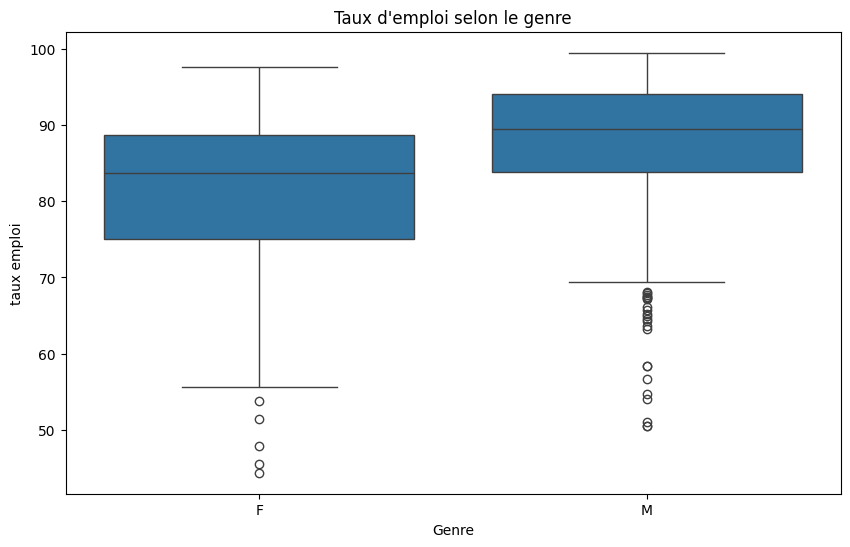

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='taux emploi', data=tauxChomEmploi)
plt.title('Taux d\'emploi selon le genre')
plt.show()

**Interpretation :**

Le taux d'emploi m√©dian semble l√©g√®rement plus √©lev√© chez les hommes (M) par rapport aux femmes (F).



*   Les hommes ont aussi une plus grande concentration de valeurs aberrantes en dessous de la moustache inf√©rieure, indiquant qu'il existe des individus masculins avec un taux d'emploi significativement plus bas.
*  La distribution des donn√©es pour les femmes est l√©g√®rement plus √©tendue, indiquant une plus grande variabilit√© dans le taux d'emploi.


En conclusion, bien que le taux d'emploi m√©dian soit similaire ou l√©g√®rement plus √©lev√© pour les hommes, les femmes semblent pr√©senter moins de valeurs aberrantes, et leur distribution est un peu plus homog√®ne.

##**Visualisation de distribution de taux de chomage selon le genre**

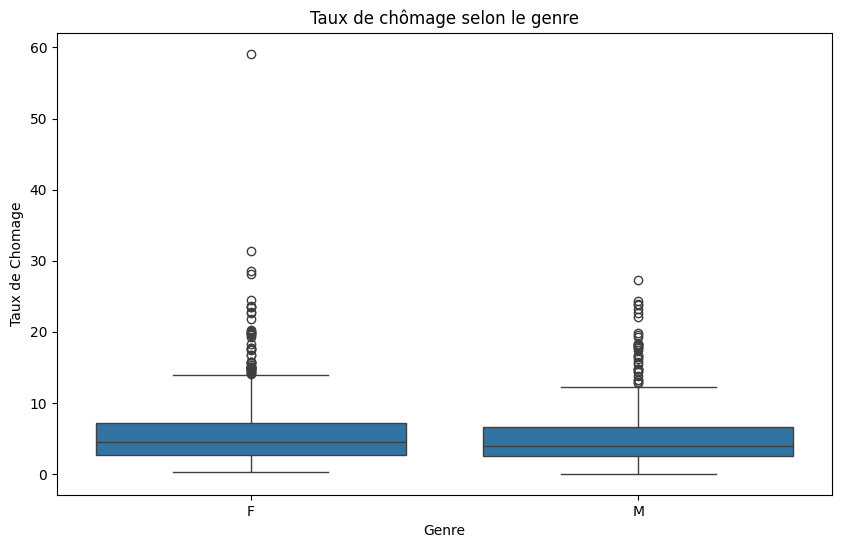

In [ ]:
# Boxplot pour le taux de ch√¥mage en fonction du genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Taux de Chomage', data=tauxChomEmploi)
plt.title('Taux de ch√¥mage selon le genre')
plt.show()


**Interpretation :**

*   La m√©diane du taux de ch√¥mage est similaire pour les deux genres (F et M), sugg√©rant qu‚Äôil n‚Äôy a pas de grande diff√©rence dans le ch√¥mage m√©dian entre hommes et femmes.
*   Les bo√Ætes sont de tailles similaires, indiquant que la variabilit√© du taux de ch√¥mage est comparable entre les genres.


*   Il y a plusieurs valeurs aberrantes pour les deux genres, mais les femmes (F) semblent avoir un point exceptionnellement √©lev√© (environ 60 % de ch√¥mage), qui est bien au-dessus des autres valeurs aberrantes.
*   Les moustaches s'√©tendent l√©g√®rement plus haut pour les hommes (M), ce qui indique que le taux de ch√¥mage le plus √©lev√©, hors aberrations, est l√©g√®rement sup√©rieur chez eux.






##**Visualisation de distribution de taux d'emploi selon le niveau d'√©tude**

<ipython-input-11-5c1b0fc3b240>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emploi_par_niveau,


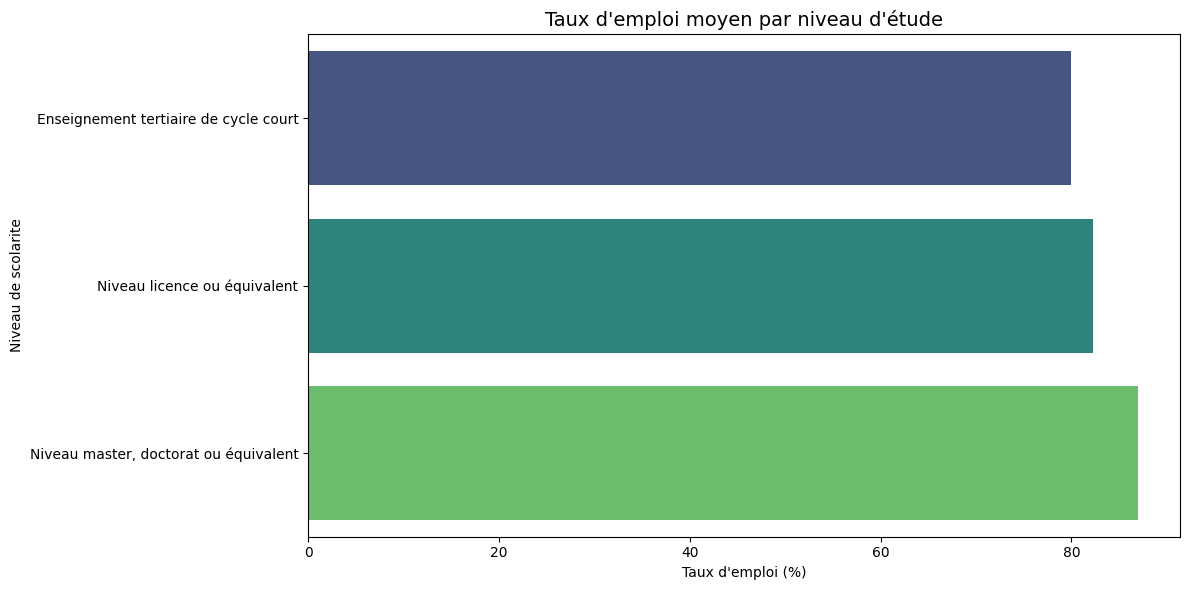

In [ ]:

emploi_par_niveau = (
    tauxChomEmploi.groupby('Niveau de scolarite')['taux emploi']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les donn√©es avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(data=emploi_par_niveau,
            x='taux emploi',
            y='Niveau de scolarite',
            palette='viridis')

plt.title("Taux d'emploi moyen par niveau d'√©tude", fontsize=14)
plt.xlabel("Taux d'emploi (%)")
plt.ylabel("Niveau de scolarite")
plt.tight_layout()
plt.show()




*   Le taux d'emploi moyen augmente avec le niveau d'√©tudes.
*   Les personnes ayant un niveau d'√©tudes plus √©lev√© (Master, Doctorat ou √©quivalent) ont le taux d'emploi le plus √©lev√©.


*  
Les personnes avec un niveau licence ont un taux d'emploi l√©g√®rement inf√©rieur √† celui des niveaux Master/Doctorat, mais sup√©rieur √† celui des √©tudes tertiaires de cycle court.
*   √âl√©ment de liste

Ce graphique montre une corr√©lation positive entre le niveau d'√©tudes et le taux d'emploi moyen. Les individus ayant des qualifications plus √©lev√©es (Master, Doctorat) semblent avoir de meilleures opportunit√©s d'emploi,




##**Visualisation de distribution de taux de chomage selon le niveau d'√©tude**

<ipython-input-14-5e9220a2f7b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chomage_par_niveau,


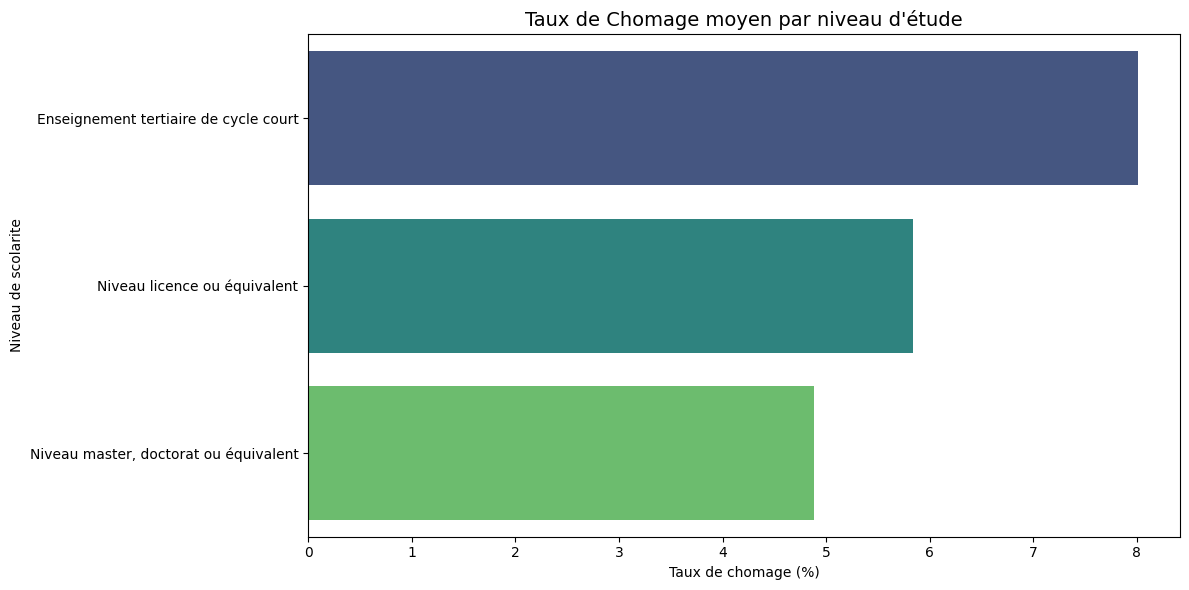

In [ ]:

chomage_par_niveau = (
    tauxChomEmploi.groupby('Niveau de scolarite')['Taux de Chomage']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les donn√©es avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(data=chomage_par_niveau,
            x='Taux de Chomage',
            y='Niveau de scolarite',
            palette='viridis')

plt.title("Taux de Chomage moyen par niveau d'√©tude", fontsize=14)
plt.xlabel("Taux de chomage (%)")
plt.ylabel("Niveau de scolarite")
plt.tight_layout()
plt.show()




*   Les taux de ch√¥mage les plus √©lev√©s sont observ√©s pour les niveaux d‚Äô√©tudes
les moins avanc√©s :


  L‚Äôenseignement tertiaire de cycle court affiche le taux de ch√¥mage le plus √©lev√©.
*   Le ch√¥mage diminue √† mesure que le niveau d‚Äô√©ducation augmente :

Les individus ayant un niveau licence ou √©quivalent connaissent un taux de ch√¥mage mod√©r√©.
Ceux ayant un niveau master, doctorat ou √©quivalent pr√©sentent le taux de ch√¥mage le plus faible.

##**Visualisation de distribution de taux d'emploi selon le domaine d'√©tude**

<ipython-input-13-5e3d5759cb3b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emploi_par_domaine,


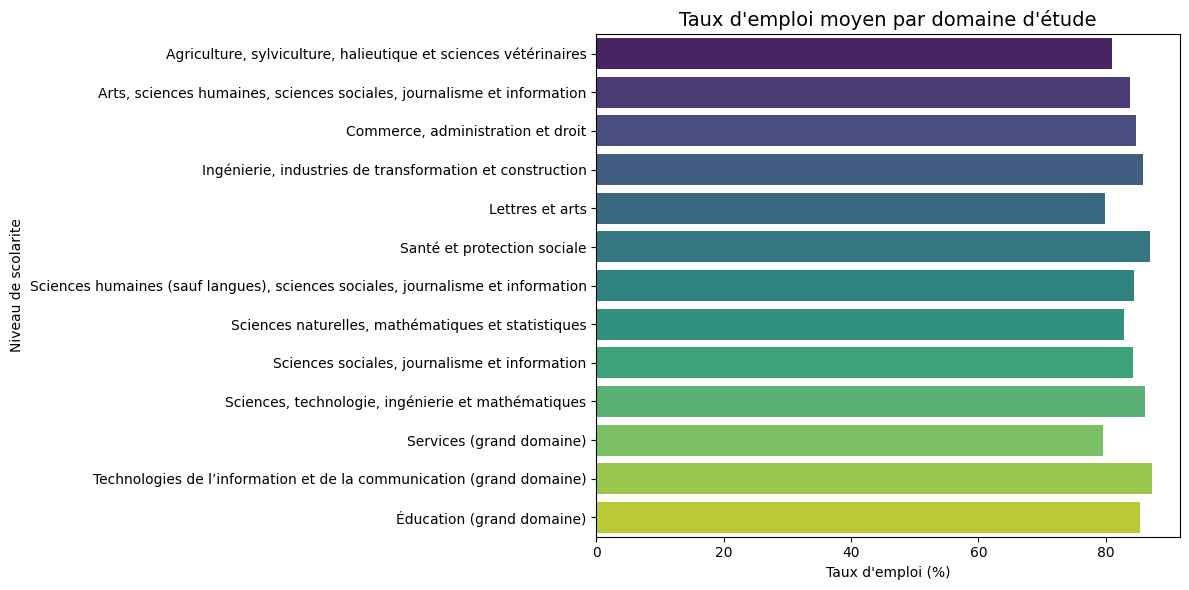

In [ ]:

emploi_par_domaine = (
    tauxChomEmploi.groupby('Domaine etudes')['taux emploi']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les donn√©es avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(data=emploi_par_domaine,
            x='taux emploi',
            y='Domaine etudes',
            palette='viridis')

plt.title("Taux d'emploi moyen par domaine d'√©tude", fontsize=14)
plt.xlabel("Taux d'emploi (%)")
plt.ylabel("Niveau de scolarite")
plt.tight_layout()
plt.show()



1.   Domaines avec les taux d'emploi les plus √©lev√©s :


*   Technologies de l‚Äôinformation et de la communication (grand domaine) suit de pr√®s, ce qui refl√®te la forte demande dans ce secteur.
*   √âducation (grand domaine) a le taux d'emploi le plus √©lev√© parmi les domaines repr√©sent√©s.



2.   Domaines avec des taux d'emploi mod√©r√©s :


*   
Les domaines comme services, sciences, technologie, ing√©nierie et math√©matiques affichent des taux d'emploi comp√©titifs.
3.  
Domaines avec les taux d'emploi les plus faibles :


*   Les secteurs tels que agriculture, sylviculture, halieutique et sciences v√©t√©rinaires et arts, sciences humaines, sciences sociales, journalisme et information ont des taux d'emploi inf√©rieurs compar√©s aux autres.








##**Visualisation de distribution de taux de chomage selon les pays**

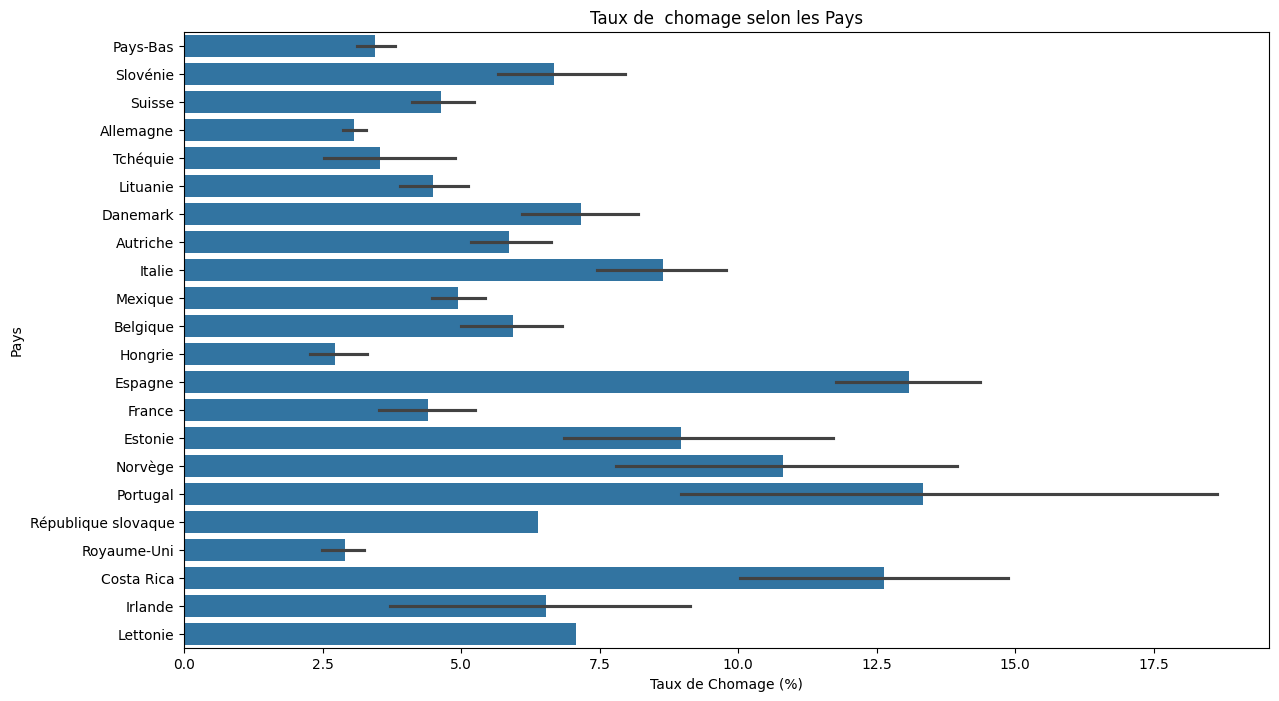

In [ ]:
# Tracer un graphique en barres horizontal pour le taux d'emploi
plt.figure(figsize=(14, 8))
sns.barplot(x='Taux de Chomage', y='Pays', data=tauxChomEmploi)
plt.title('Taux de  chomage selon les Pays')
plt.xlabel('Taux de Chomage (%)')
plt.ylabel('Pays')
plt.show()



1.   Pays avec les taux de ch√¥mage les plus bas :


*   Les Pays-Bas, la Suisse, l‚ÄôAllemagne, et le Royaume-Uni affichent des taux de ch√¥mage particuli√®rement faibles, souvent autour de 2 √† 4 %.



2.  Pays avec les taux de ch√¥mage les plus √©lev√©s :


*   
Des pays comme l‚ÄôEspagne, le Portugal, et la Lettonie pr√©sentent des taux de ch√¥mage √©lev√©s, parfois sup√©rieurs √† 10 %. Cela peut refl√©ter des d√©fis structurels ou √©conomiques dans ces r√©gions.
3.  
Pays interm√©diaires :



*   La France, l‚ÄôItalie, et la Belgique ont des taux de ch√¥mage mod√©r√©s, oscillant autour de 7 √† 9 %, ce qui reste significatif mais moins extr√™me que dans certains pays du sud de l‚ÄôEurope






##**Visualisation des corr√©lation entre les variables de cette dataset par la matrice de corr√©lation**

                         Pays     Genre       Age  Niveau de scolarite  \
Pays                 1.000000 -0.015369  0.021557             0.091023   
Genre               -0.015369  1.000000  0.049411            -0.033581   
Age                  0.021557  0.049411  1.000000             0.028315   
Niveau de scolarite  0.091023 -0.033581  0.028315             1.000000   
Domaine etudes       0.007575  0.002327 -0.030151            -0.031600   
taux emploi          0.023379  0.313438  0.004154             0.267133   
Taux de Chomage     -0.080158 -0.053161 -0.247325            -0.167483   

                     Domaine etudes  taux emploi  Taux de Chomage  
Pays                       0.007575     0.023379        -0.080158  
Genre                      0.002327     0.313438        -0.053161  
Age                       -0.030151     0.004154        -0.247325  
Niveau de scolarite       -0.031600     0.267133        -0.167483  
Domaine etudes             1.000000     0.033864        -0.071727  

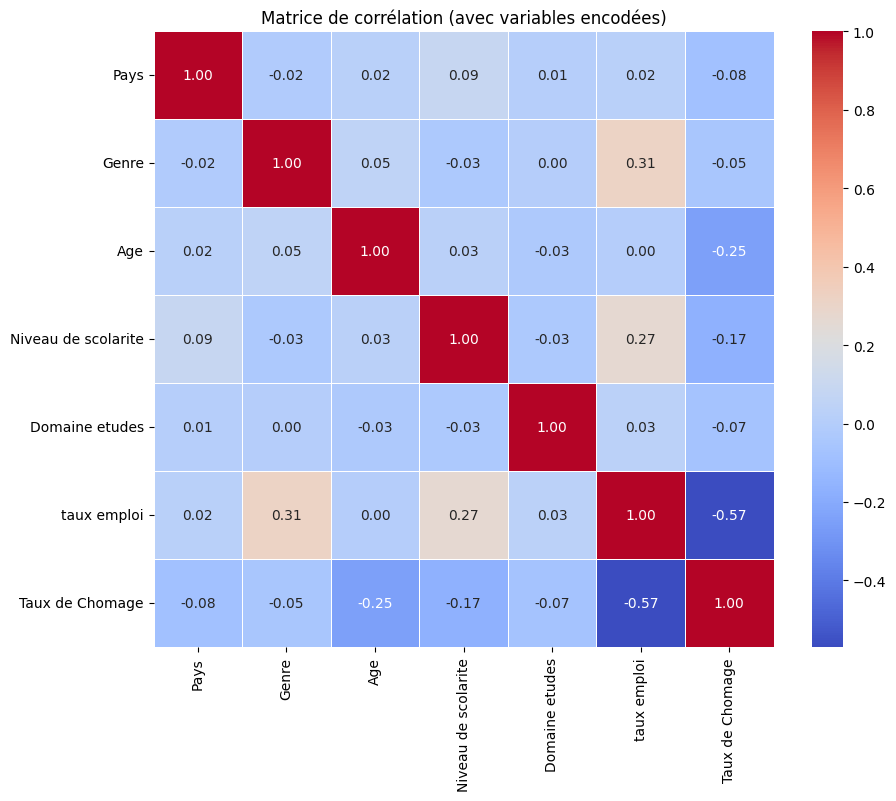

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encodage des variables cat√©goriques
df_encoded = tauxChomEmploi.copy()
for column in ['Pays', 'Genre', 'Age', 'Niveau de scolarite', 'Domaine etudes']:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

# Calcul de la matrice de corr√©lation
correlation_matrix = df_encoded.corr()

# Affichage de la matrice de corr√©lation
print(correlation_matrix)

# Visualisation avec heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matrice de corr√©lation (avec variables encod√©es)')
plt.show()


1. Corr√©lation entre taux emploi et Taux de Chomage :

-0.57 (corr√©lation n√©gative mod√©r√©e √† forte). Plus le taux d'emploi est √©lev√©, plus le taux de ch√¥mage tend √† √™tre faible (relation intuitive).
Corr√©lation entre Genre et taux emploi :
2. Corr√©lation entre Age et Taux de Chomage :
-0.25 (corr√©lation n√©gative faible). Les personnes plus √¢g√©es pourraient avoir un taux de ch√¥mage l√©g√®rement plus faible.
3. Corr√©lation entre Niveau de scolarite et taux emploi :

0.27 (corr√©lation positive faible √† mod√©r√©e). Un niveau d'√©tudes plus √©lev√© est associ√© √† un taux d'emploi plus important.
4. Absence de corr√©lation forte pour certaines variables :

Les corr√©lations entre Domaine etudes et d'autres variables sont tr√®s faibles (autour de 0), ce qui sugg√®re que cette variable pourrait ne pas avoir de relation lin√©aire directe avec celles analys√©es ici.

**5-2- datset PIB&Depense :**

In [ ]:
df = pd.read_csv('PIB&Depense.csv')
df.head()

Pays          PIB    depense secteur
0              T√ºrkiye   819.865295   8.342024     S13
1              T√ºrkiye   819.865295  55.245168     S1M
2  R√©publique slovaque   120.592216  11.438495     S13
3  R√©publique slovaque   120.592216  56.512972     S1M
4            Allemagne  4348.297440  50.070965     S1M

In [ ]:
numeric_summary = df[["PIB", "depense"]].describe()
print("\nDescriptive Statistics for Numeric Columns:\n", numeric_summary)


Descriptive Statistics for Numeric Columns:
                 PIB    depense
count     76.000000  76.000000
mean    1594.714885  30.543770
std     3831.634429  23.760757
min       25.825287   3.867823
25%      218.303802   8.068804
50%      517.337251  17.497540
75%     1670.647464  53.008939
max    23594.031000  72.701852


- PIB (Produit Int√©rieur Brut) :
  - Count : Il y a 76 observations dans le jeu de donn√©es.
  - Moyenne (mean) : Le PIB moyen est d'environ 1594,71, ce qui indique la tendance centrale des donn√©es.
  - √âcart type (std) : Les valeurs du PIB pr√©sentent une grande dispersion, avec un √©cart type d'environ 3831,63, ce qui sugg√®re une variabilit√© importante des donn√©es.
  - Minimum (min) : La valeur la plus basse du PIB est d'environ 25,83.
  - 25e percentile (25%) : 25 % des observations ont un PIB inf√©rieur √† 218,30.
  - M√©diane (50%) : La m√©diane du PIB est d'environ 517,34, ce qui signifie que la moiti√© des observations ont un PIB inf√©rieur √† cette valeur.
  - 75e percentile (75%) : 75 % des observations ont un PIB inf√©rieur √† 1670,65.
  - Maximum (max) : La valeur maximale du PIB est de 23594,03, bien plus √©lev√©e que les autres valeurs, ce qui indique la pr√©sence de valeurs extr√™mes ou de valeurs aberrantes.
- D√©pense (Expenditure) :
  - Count : Il y a √©galement 76 observations pour les d√©penses.
  - Moyenne (mean) : La d√©pense moyenne est d'environ 30,54.
  - √âcart type (std) : Les valeurs des d√©penses pr√©sentent un √©cart type d'environ 23,76, ce qui indique une variabilit√© mod√©r√©e des donn√©es.
  - Minimum (min) : La d√©pense la plus basse est d'environ 3,87.
  - 25e percentile (25%) : 25 % des observations ont une d√©pense inf√©rieure √† 8,07.
  - M√©diane (50%) : La m√©diane des d√©penses est d'environ 17,50, ce qui signifie que la moiti√© des observations ont une d√©pense inf√©rieure √† cette valeur.
  - 75e percentile (75%) : 75 % des observations ont une d√©pense inf√©rieure √† 53,01.
  - Maximum (max) : La d√©pense maximale est de 72,70, ce qui est consid√©rablement plus √©lev√© que la moyenne, indiquant une limite sup√©rieure potentielle pour les d√©penses.


**Distribution des PIB par pays :**


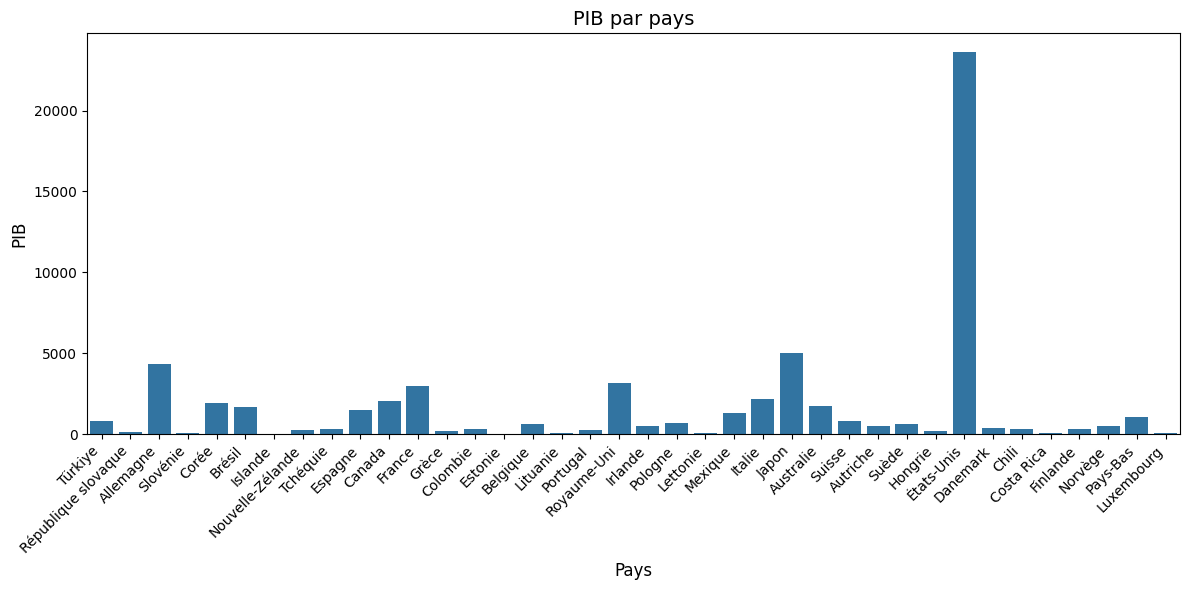

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Pays', y='PIB')
plt.title('PIB par pays', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('PIB', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

**Interpr√©tation du graphique :**
- √âtats-Unis : Ce pays domine largement le graphique avec un PIB extr√™mement √©lev√© par rapport aux autres.
- Un PIB √©lev√© refl√®te souvent une √©conomie dynamique, une forte consommation interne, une grande capacit√© d'innovation et une forte attractivit√© pour les investissements √©trangers.
- Autres pays : La plupart des pays ont un PIB relativement faible en comparaison avec √âtats-Unis, avec quelques exceptions comme l'Allemagne et le Japon qui se d√©marquent.
- D√©s√©quilibre : La disparit√© est significative, et cela peut √™tre li√© √† la taille de l'√©conomie, la population, ou d'autres facteurs √©conomiques propres √† chaque pays.


**Distribution des d√©penses par secteur :**




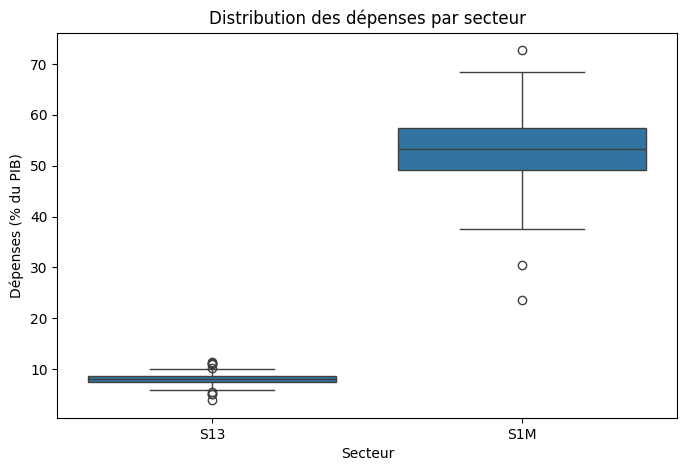

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="secteur", y="depense", data=df)
plt.title("Distribution des d√©penses par secteur")
plt.xlabel("Secteur")
plt.ylabel("D√©penses (% du PIB)")
plt.show()


**Interpr√©tation du graphique :**
- Secteur S1M (consommation priv√©e) :

  - La m√©diane est autour de 50 % du PIB.
  - Grande dispersion avec des valeurs allant de 35 % √† 65 %.
  - Des outliers montrent des pays o√π la consommation priv√©e est exceptionnellement √©lev√©e (sup√©rieure √† 70 %) ou basse (environ 30 %).
  - Une forte d√©pendance sur les d√©penses priv√©es peut indiquer une moindre intervention de l'√âtat dans l'√©conomie.
  - La grande variabilit√© montre que certains pays adoptent des politiques de consommation priv√©e tr√®s diff√©rentes, influenc√©es par leur niveau de d√©veloppement ou leur mod√®le √©conomique.
- Secteur S13 (d√©penses publiques) :

  - La m√©diane est autour de 10 % du PIB.
  - Faible dispersion, indiquant une homog√©n√©it√© dans les d√©penses publiques.
  - Quelques outliers refl√®tent des pays avec des d√©penses publiques l√©g√®rement atypiques.
  - Les faibles niveaux de d√©penses publiques indiquent que de nombreux pays laissent aux m√©nages la responsabilit√© de financer des services tels que la sant√©, l'√©ducation ...
  - Les √©carts r√©duits refl√®tent une certaine convergence des pays dans leurs politiques publiques.



**D√©penses par secteur pour chaque pays :**

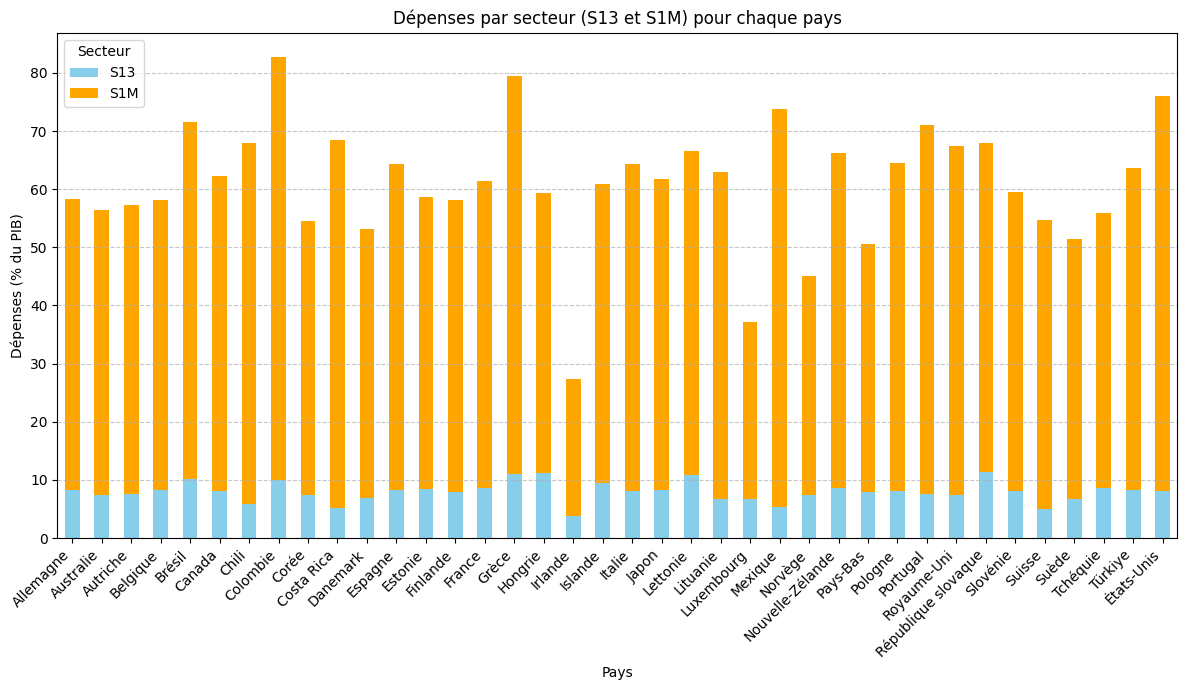

In [ ]:
depenses_par_pays = df.pivot_table(values='depense', index='Pays', columns='secteur', aggfunc='sum')

depenses_par_pays.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'orange'])
plt.title("D√©penses par secteur (S13 et S1M) pour chaque pays")
plt.ylabel("D√©penses (% du PIB)")
plt.xlabel("Pays")
plt.legend(title="Secteur")
plt.xticks(rotation=45,fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Interpr√©tation du graphique :**
- Les d√©penses S1M (orange) dominent dans la plupart des pays, atteignant parfois plus de 70 % du PIB .Exemple : √âtats-Unis, Colombie , et Gr√®ce.
- C'est a dire les d√©penses priv√©es constituent la majeure partie des d√©penses totales.Cela indique une √©conomie ax√©e sur le march√©, o√π les m√©nages financent directement leurs besoins (sant√©, √©ducation, etc.).
- Les d√©penses S13 (bleu) restent faibles en comparaison, oscillant g√©n√©ralement autour de 10 % du PIB.
- Si les d√©penses publiques relativement plus √©lev√©es, cela refl√®te une forte implication des gouvernements dans la fourniture de services publics(pris en charge par l'√âtat), ce qui garanti l'√©quit√© sociale et l'acc√®s universel aux services essentiels.

**Comment les d√©penses en pourcentage du PIB influencent-elles le PIB d‚Äôun pays (en billions USD) ?**

Pour r√©pondre a cette question on doit appliquer une r√©gression lin√©aire simple pour mod√©liser la relation entre les d√©penses (% du PIB) et le PIB (en billions USD).

**5-3-la dataset de diffRevenue :**

In [ ]:
diffRevenue = pd.read_csv('/content/drive/MyDrive/diffRe2021.csv')
# description de data
diffRevenue.head()


Pays      Groupe age  \
0  Danemark  De 45 √† 54 ans   
1    Canada  De 25 √† 34 ans   
2  Lettonie  De 55 √† 64 ans   
3    Suisse  De 55 √† 64 ans   
4  Autriche  De 55 √† 64 ans   

                                        Niveau etude  \
0  Deuxi√®me cycle du secondaire ou post-secondair...   
1  Deuxi√®me cycle du secondaire ou post-secondair...   
2              Niveau master, doctorat ou √©quivalent   
3         Enseignement post-secondaire non tertiaire   
4  Fili√®re g√©n√©rale du deuxi√®me cycle du secondai...   

   Proportion des revenus des femmes par rapport aux hommes (%)  
0                                          78.976540             
1                                          73.081802             
2                                          82.032822             
3                                          80.070908             
4                                         107.294113

In [ ]:
# Obtenir des informations sur la structure du dataset
diffRevenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Pays                                                          1470 non-null   object 
 1   Groupe age                                                    1470 non-null   object 
 2   Niveau etude                                                  1470 non-null   object 
 3   Proportion des revenus des femmes par rapport aux hommes (%)  1470 non-null   float64
dtypes: float64(1), object(3)
memory usage: 46.1+ KB


In [ ]:
diffRevenue.describe()

Proportion des revenus des femmes par rapport aux hommes (%)
count                                        1470.000000           
mean                                           79.528683           
std                                             7.477461           
min                                            51.759571           
25%                                            75.493963           
50%                                            80.070908           
75%                                            83.090586           
max                                           118.847076

<ipython-input-10-85cafe7d6696>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


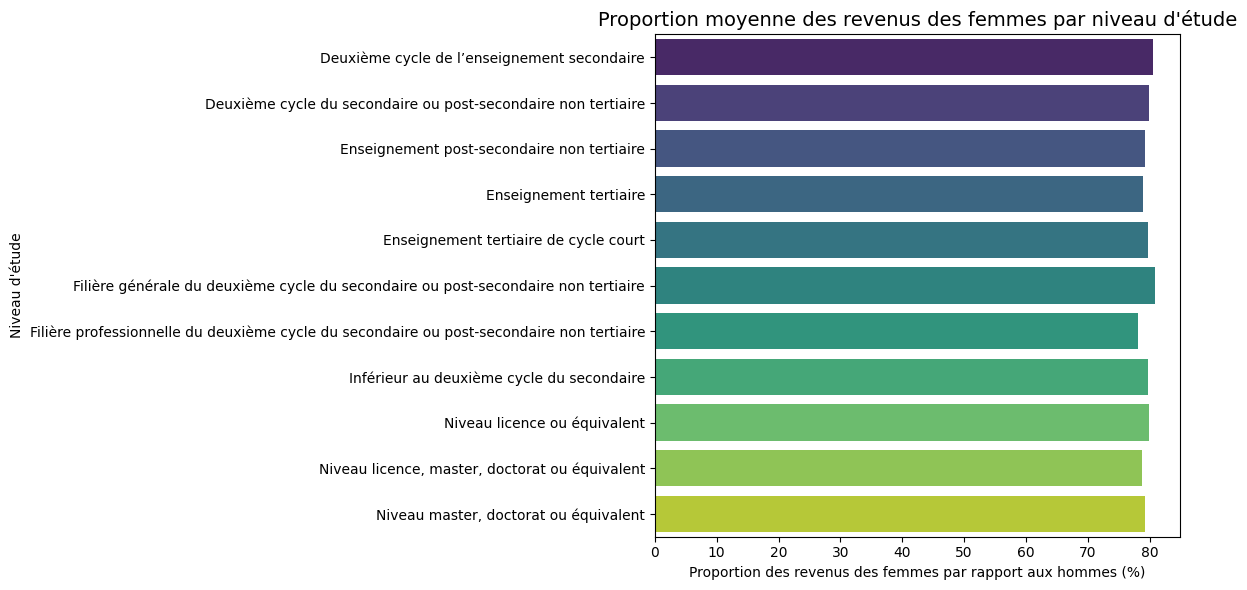

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la moyenne des proportions par niveau d'√©tude
revenus_par_niveau = (
    diffRevenue.groupby('Niveau etude')['Proportion des revenus des femmes par rapport aux hommes (%)']
    .mean()
    .sort_index()
    .reset_index()
)

# Visualiser les donn√©es avec un diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    data=revenus_par_niveau,
    x='Proportion des revenus des femmes par rapport aux hommes (%)',
    y='Niveau etude',
    palette='viridis'
)

# Ajouter des d√©tails au graphique
plt.title("Proportion moyenne des revenus des femmes par niveau d'√©tude", fontsize=14)
plt.xlabel("Proportion des revenus des femmes par rapport aux hommes (%)")
plt.ylabel("Niveau d'√©tude")
plt.tight_layout()
plt.show()


<ipython-input-13-8d610237246a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


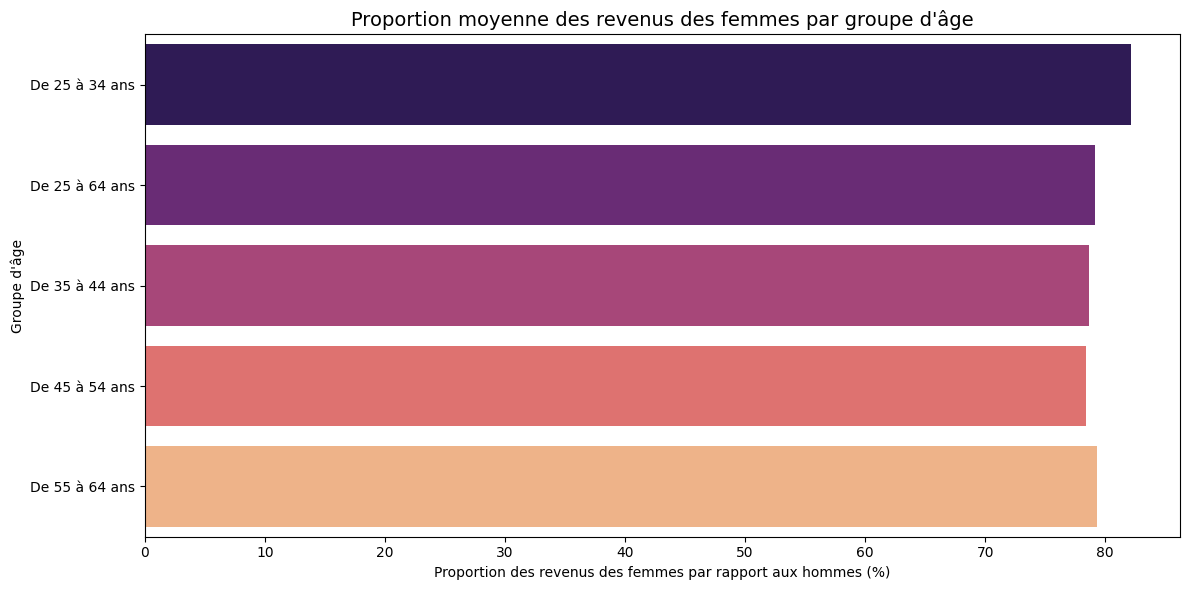

In [ ]:
# Visualisation par "Groupe age"
plot_bar_by_category(
    df=diffRevenue,
    category="Groupe age",
    value="Proportion des revenus des femmes par rapport aux hommes (%)",
    title="Proportion moyenne des revenus des femmes par groupe d'√¢ge",
    xlabel="Proportion des revenus des femmes par rapport aux hommes (%)",
    ylabel="Groupe d'√¢ge",
    palette="magma"
)

<ipython-input-13-8d610237246a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


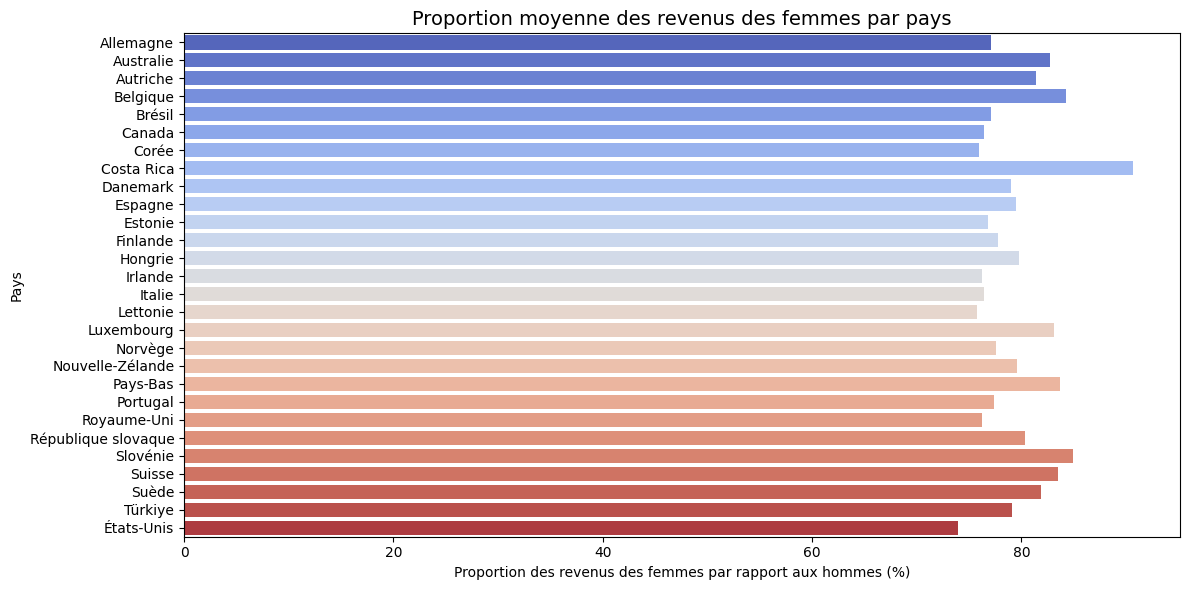

In [ ]:
# Visualisation par "Pays"
plot_bar_by_category(
    df=diffRevenue,
    category="Pays",
    value="Proportion des revenus des femmes par rapport aux hommes (%)",
    title="Proportion moyenne des revenus des femmes par pays",
    xlabel="Proportion des revenus des femmes par rapport aux hommes (%)",
    ylabel="Pays",
    palette="coolwarm"
)



#**3- Analyse de Donn√©es :**

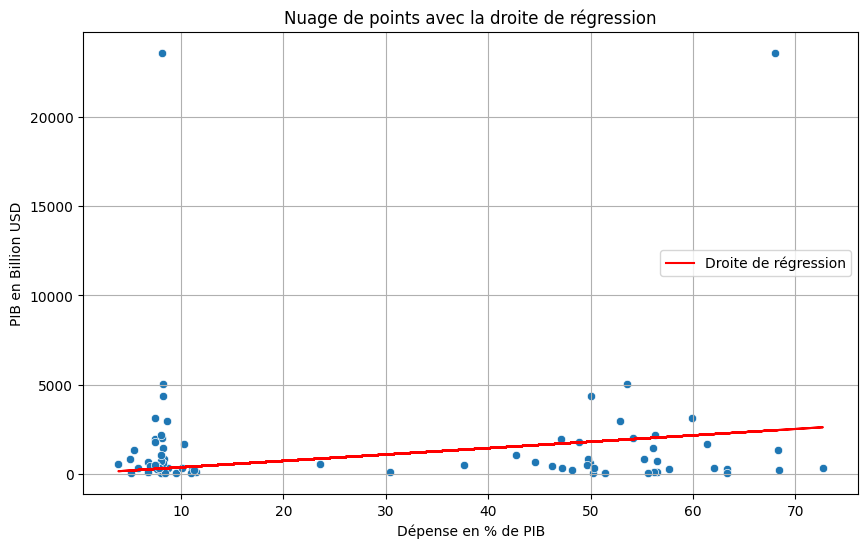

In [ ]:
X = df[['depense']]
y = df['PIB']
model = sm.OLS(y, X).fit()
# Pr√©dire les valeurs de y √† partir du mod√®le
y_pred = model.predict(X)

# Cr√©er le nuage de points avec la droite de r√©gression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depense', y='PIB', data=df)
plt.plot(df['depense'], y_pred, color='red', label='Droite de r√©gression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de r√©gression')
plt.xlabel('D√©pense en % de PIB')
plt.ylabel('PIB en Billion USD')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

La droite de r√©gression montre une tendance l√©g√®rement croissante, indiquant une relation positive entre les d√©penses et le PIB.C.est a dire une augmentation des d√©penses en % du PIB est associ√©e √† une augmentation moyenne du PIB.
- Concentration des points dans des zones sp√©cifiques (elle refl√®te des groupes de pays ayant des profils √©conomiques similaires) :

   - Zone √† faible d√©pense (0-15 %) et faible PIB : La majorit√© des pays ont des d√©penses en pourcentage du PIB relativement faibles, associ√©es √† un PIB √©galement faible. Cela peut indiquer que ces pays partagent des caract√©ristiques communes, comme des √©conomies √©mergentes ou de petite taille.
   - Zone avec des valeurs extr√™mes (outliers) : Quelques √©lements se situent loin de cette concentration, avec un PIB tr√®s √©lev√© malgr√© une d√©pense relativement moyenne. Ces points repr√©sentent des √©conomies exceptionnelles qui ne suivent pas la tendance g√©n√©rale.
- Dispersion des points :

   - La dispersion refl√®te la variabilit√© dans la relation entre les d√©penses et le PIB.
   - Cette dispersion indique que d'autres facteurs influencent le PIB, ce qui limite la capacit√© des d√©penses seules √† pr√©dire le PIB.


**R√©sum√© du mod√®le :**

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PIB   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.101
Method:                 Least Squares   F-statistic:                              9.494
Date:                Mon, 23 Dec 2024   Prob (F-statistic):                     0.00288
Time:                        23:38:20   Log-Likelihood:                         -736.03
No. Observations:                  76   AIC:                                      1474.
Df Residuals:                      75   BIC:                                      1476.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Intrepr√©tations :**
- R-squared (R¬≤) =  0.112 : Cela indique que 11.2% de la variance de la variable d√©pendante (PIB) est expliqu√©e par les d√©penses . Cela sugg√®re que le mod√®le ne parvient pas √† bien expliquer la variation du PIB en fonction des d√©penses, ce qui peut indiquer que d'autres facteurs non pris en compte pourraient √™tre responsables de la variation du PIB.
- depense (coefficient) = 35.8364 : ce qui montre que depense a un effet posotive sur le PIB, dont chaque augmentation d'une unit√© de d√©pense en pourcentage du PIB est associ√©e √† une augmentation de 35.8364 dans le PIB (en billions USD).

**Tests de r√©gression :** pour √©valuer la qualit√© du mod√®le de r√©gression

**Test de Durbin-Watson (DW) :** pour mesurer l'autocorr√©lation des r√©sidus du mod√®le de r√©gression :

In [ ]:
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')

Test de Durbin-Watson: 1.1627120469427652


- DW = 1.162 indique une autocorr√©lation positive mod√©r√©e dans les r√©sidus. Cela signifie que les erreurs dans le mod√®le sont corr√©l√©es dans une certaine mesure.Ce qui  pourrait sugg√©rer qu'il existe une relation entre les observations.

**Test de White :** pour v√©rifier la pr√©sence d'h√©t√©rosc√©dasticit√©(si la variance des r√©sidus est constante √† travers les observations )

In [ ]:
X_with_const = sm.add_constant(model.model.exog)

new_model = sm.OLS(model.model.endog, X_with_const).fit()

white_test = het_white(new_model.resid, new_model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))


{'LM statistic': 3.5399213834969983, 'p-value': 0.17033968444896883, 'f-statistic': 1.7831491900729628, 'f p-value': 0.17535175397488675}


- p-value vaut 0.17 > 0.05 sugg√®re que nous n'avons pas de preuves suffisantes pour rejeter l'hypoth√®se nulle. En d'autres termes, la variance des r√©sidus semble √™tre constante.
- Cela peut indiquer que la relation entre ces deux variables semble stable, peu importe le niveau de PIB.

**Test de normalit√© de Shapiro-Wilk :** utilis√© pour v√©rifier si les r√©sidus suivent une distribution normale.

In [ ]:
shapiro_test = stats.shapiro(model.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.47090263225126716, pvalue=4.362107488354104e-15)


-  p-value ‚âà 4.36e-15, inf√©rieur a 0.05, ce qui indique que les r√©sidus ne suivent pas une distribution normale.
- Cela peut indiquer que la relation entre les d√©penses en pourcentage du PIB et le PIB en billions USD n'est peut-√™tre pas parfaitement lin√©aire, ou qu'il existe des facteurs non pris en compte dans le mod√®le qui influencent cette relation.

##**Dans quelle mesure le taux de ch√¥mage impacte-t-il le taux d'emploi ?**



##On r√©pond en appliquant la r√©gression lin√©aire :

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Charger les donn√©es
tauxChomEmploi = pd.read_csv('/content/drive/MyDrive/tauxChomEmploi2.csv')
# description de data
tauxChomEmploi.head()


Pays Genre             Age                    Niveau de scolarite  \
0   Pays-Bas     F  De 45 √† 54 ans           Niveau licence ou √©quivalent   
1   Slov√©nie     M  De 35 √† 44 ans  Niveau master, doctorat ou √©quivalent   
2     Suisse     F  De 35 √† 44 ans           Niveau licence ou √©quivalent   
3  Allemagne     M  De 45 √† 54 ans  Niveau master, doctorat ou √©quivalent   
4     Suisse     M  De 25 √† 34 ans  Niveau master, doctorat ou √©quivalent   

                                      Domaine etudes  taux emploi  \
0  Sciences, technologie, ing√©nierie et math√©mati...    81.568626   
1                          √âducation (grand domaine)    91.121391   
2                                    Lettres et arts    72.585220   
3  Sciences humaines (sauf langues), sciences soc...    92.181023   
4  Ing√©nierie, industries de transformation et co...    95.193298   

   Taux de Chomage  
0         2.347418  
1         7.145464  
2        15.116038  
3         3.538925  
4         3.940461

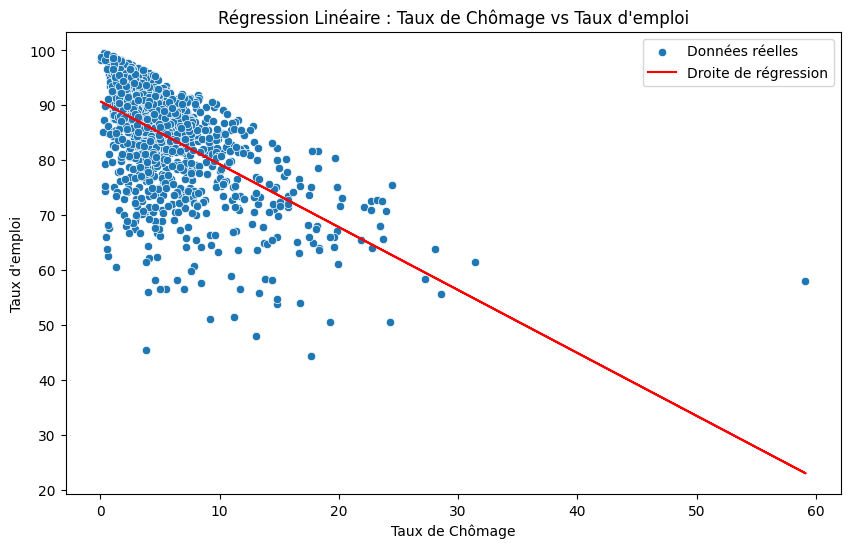

Coefficient de r√©gression (pente) : -1.1459794550043112
Ordonn√©e √† l'origine : 90.7302564292137
Score R^2 : 0.32586443443023394


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



# S√©lectionner les variables
X = tauxChomEmploi[['Taux de Chomage']]  # Variable ind√©pendante
y = tauxChomEmploi['taux emploi']       # Variable d√©pendante

# Cr√©er une instance du mod√®le de r√©gression lin√©aire
reg_model = LinearRegression()

# Entra√Æner le mod√®le
reg_model.fit(X, y)

# Pr√©dire les valeurs de y bas√©es sur le mod√®le
y_pred = reg_model.predict(X)

# Tracer le nuage de points et la droite de r√©gression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Taux de Chomage'], y=y, label='Donn√©es r√©elles')
plt.plot(X['Taux de Chomage'], y_pred, color='red', label='Droite de r√©gression')

# Ajouter des titres et des labels
plt.title('R√©gression Lin√©aire : Taux de Ch√¥mage vs Taux d\'emploi')
plt.xlabel('Taux de Ch√¥mage')
plt.ylabel('Taux d\'emploi')
plt.legend()

# Afficher le graphique
plt.show()

# Afficher les coefficients du mod√®le
print(f"Coefficient de r√©gression (pente) : {reg_model.coef_[0]}")
print(f"Ordonn√©e √† l'origine : {reg_model.intercept_}")
print(f"Score R^2 : {r2_score(y, y_pred)}")


* Corr√©lation n√©gative:

La pente de la droite est n√©gative, indiquant qu'il existe une relation inverse entre le taux de ch√¥mage et le taux d'emploi. En d'autres termes, plus le taux de ch√¥mage est √©lev√©, plus le taux d'emploi est faible.
Alignement des points :

* Les points sont globalement align√©s le long de la droite de r√©gression, ce qui sugg√®re que la r√©gression lin√©aire est un mod√®le raisonnable pour d√©crire cette relation. Cependant, il y a une certaine dispersion autour de la droite.

* Le
ùëÖ
  indique la proportion de la variance dans la variable d√©pendante (taux d'emploi) expliqu√©e par la variable ind√©pendante (taux de ch√¥mage).

* Un
ùëÖ
carr√©
  de 0.326 (ou 32.6 %) signifie que seulement environ 32.6 % de la variabilit√© du taux d'emploi est expliqu√©e par le taux de ch√¥mage.
Ce score est relativement faible, ce qui sugg√®re que d'autres facteurs non inclus dans le mod√®le influencent le taux d'emploi.



##**Comment la dispersion des taux de ch√¥mage diff√®re-t-elle entre les diff√©rents niveaux d'√©tudes‚ÄØ?**

##On r√©pond en appliquant **ANOVA** :

ANOVA : Impact des niveau d'√©tudes sur le taux de ch√¥mage
                              sum_sq      df          F        PR(>F)
C(Niveau_de_scolarite)    816.292999     2.0  18.341049  1.439268e-08
Residual                25769.171549  1158.0        NaN           NaN


<ipython-input-6-463cd1027932>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Niveau_de_scolarite', y='Taux_de_Chomage', palette='coolwarm')


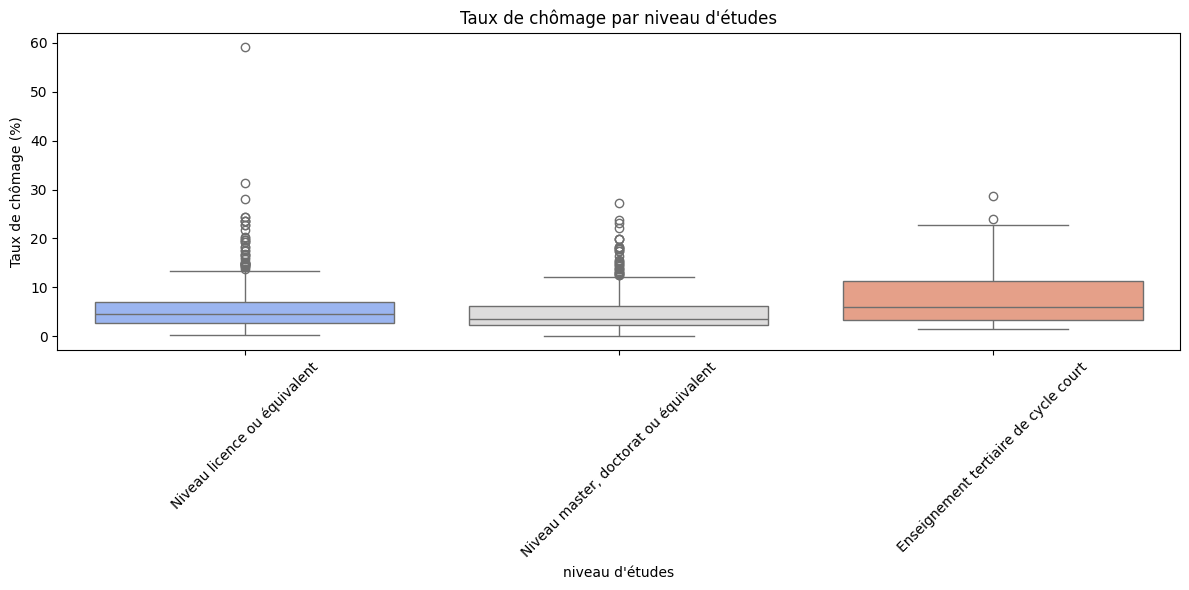

In [6]:
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
# Renommer les colonnes pour supprimer les espaces
df = tauxChomEmploi.rename(columns={
    'Taux de Chomage': 'Taux_de_Chomage',
    'Niveau de scolarite': 'Niveau_de_scolarite'
})

# ANOVA apr√®s renommage des colonnes
model = ols('Taux_de_Chomage ~ C(Niveau_de_scolarite)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les r√©sultats
print("ANOVA : Impact des niveau d'√©tudes sur le taux de ch√¥mage")
print(anova_table)

# Visualisation des donn√©es
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Niveau_de_scolarite', y='Taux_de_Chomage', palette='coolwarm')
plt.title("Taux de ch√¥mage par niveau d'√©tudes")
plt.xlabel("niveau d'√©tudes")
plt.ylabel("Taux de ch√¥mage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretation :**

* Comparaison entre les domaines :

* Niveau licence ou √©quivalent : La m√©diane est relativement basse, mais il y a plusieurs outliers avec des taux de ch√¥mage tr√®s √©lev√©s, d√©passant parfois 50 %.
* Niveau master, doctorat ou √©quivalent : La m√©diane est l√©g√®rement inf√©rieure, et il semble que les taux de ch√¥mage soient globalement concentr√©s autour de valeurs faibles (moins d'outliers).
* Enseignement tertiaire de cycle court : La distribution est similaire √† celle du niveau licence, mais il y a moins de valeurs extr√™mes.

* sum_sq : La somme des carr√©s pour le facteur Niveau_de_scolarite est de 816.29, ce qui montre l'importance de ce facteur dans l'explication de la variabilit√© du taux de ch√¥mage.
* df : Les degr√©s de libert√© pour cette variable sont de 2, ce qui signifie qu'il y a trois cat√©gories de niveaux d'√©tudes dans votre mod√®le.
* F : La valeur F de 18.34 indique que la variation entre les groupes (niveaux d'√©tudes) est beaucoup plus grande que la variation r√©siduelle, ce qui confirme une forte relation entre le niveau d'√©tudes et le taux de ch√¥mage.
* PR(>F) : La valeur p est de 1.44e-08, ce qui est tr√®s significatif et signifie que vous pouvez rejeter l'hypoth√®se nulle (qui sugg√®re qu'il n'y a pas d'effet du niveau d'√©tudes sur le taux de ch√¥mage).

* Conclusion g√©n√©rale :

Les niveaux sup√©rieurs d'√©tudes (comme master ou doctorat) semblent √™tre associ√©s √† des taux de ch√¥mage plus faibles et moins de dispersion. Les niveaux de cycle court ou √©quivalents montrent une plus grande variation et des risques plus √©lev√©s de ch√¥mage dans certains cas.

##**Y a-t-il une forte variabilit√© du taux d'emploi selon les domaines d'√©tudes ?**

##**en appliquant ANOVA on repond :**

ANOVA : Impact des domaines d'√©tudes sur le taux d'emploi
                          sum_sq      df         F        PR(>F)
C(Domaine_etudes)    4757.173819    12.0  4.445011  5.343476e-07
Residual           102385.123387  1148.0       NaN           NaN


<ipython-input-11-7b3f07f528a0>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordre_domaine = df.groupby('Domaine_etudes')['taux_emploi'].median().sort_values().index
<ipython-input-11-7b3f07f528a0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Domaine_etudes', y='taux_emploi', palette='coolwarm')


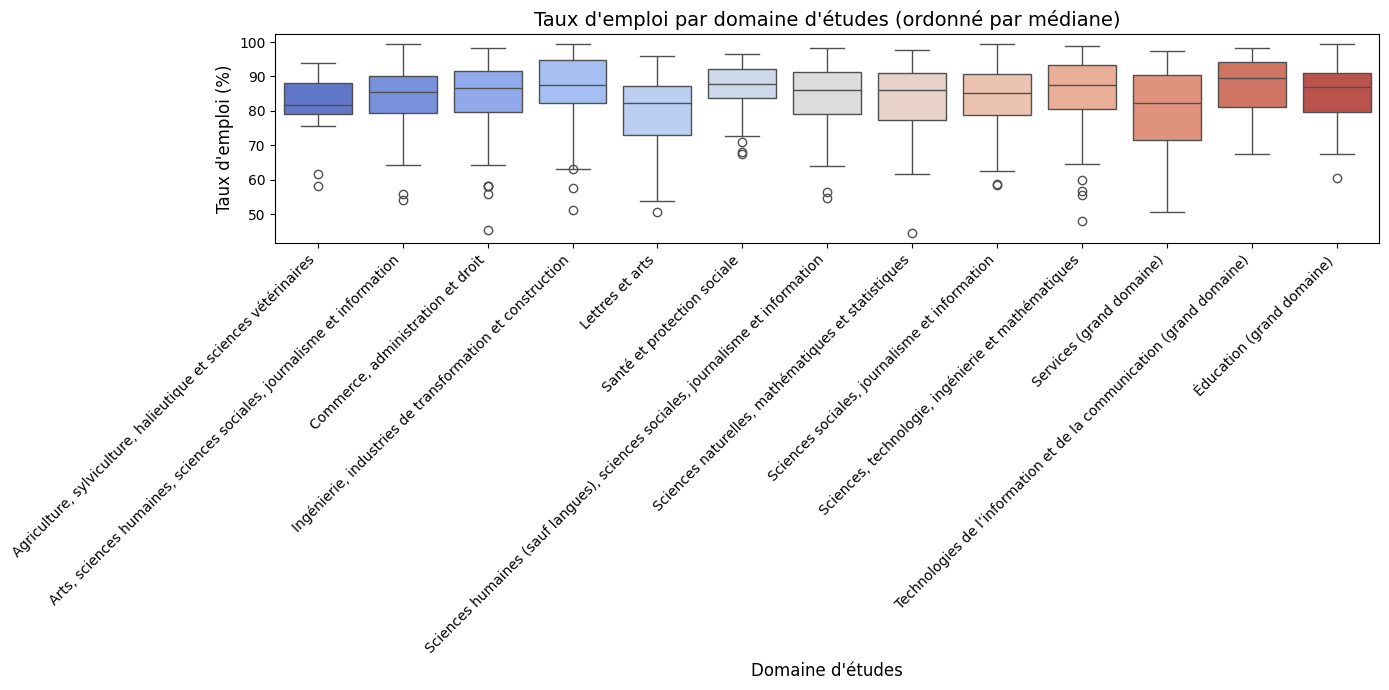

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Renommer les colonnes pour supprimer les espaces
df = tauxChomEmploi.rename(columns={
    'taux emploi': 'taux_emploi',
    'Domaine etudes': 'Domaine_etudes'
})

# ANOVA apr√®s renommage des colonnes
model = ols('taux_emploi ~ C(Domaine_etudes)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher les r√©sultats de l'ANOVA
print("ANOVA : Impact des domaines d'√©tudes sur le taux d'emploi")
print(anova_table)

# Ajouter une colonne pour ordonner les domaines d'√©tudes par m√©diane
df['Domaine_etudes'] = df['Domaine_etudes'].astype('category')
ordre_domaine = df.groupby('Domaine_etudes')['taux_emploi'].median().sort_values().index
df['Domaine_etudes'] = df['Domaine_etudes'].cat.reorder_categories(ordre_domaine, ordered=True)

# Visualisation am√©lior√©e des donn√©es
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Domaine_etudes', y='taux_emploi', palette='coolwarm')

# Ajouter des titres et ajustements
plt.title("Taux d'emploi par domaine d'√©tudes (ordonn√© par m√©diane)", fontsize=14)
plt.xlabel("Domaine d'√©tudes", fontsize=12)
plt.ylabel("Taux d'emploi (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()




*   F-statistic (F) : 4.445  Une statistique F √©lev√©e indique que les diff√©rences entre les groupes sont probablement significatives.
* p-value (PR(>F)) : 5.34√ó10‚àí75.34√ó10 ‚àí7
   Cette valeur extr√™mement faible (< 0.05) indique qu'il y a une diff√©rence significative entre les domaines d'√©tudes.

* Conclusion g√©n√©rale :
Le graphique montre que les domaines d'√©tudes influencent significativement le taux d'emploi, en ligne avec les r√©sultats de l'ANOVA.
Les domaines techniques et li√©s aux TIC (technologies de l'information) offrent g√©n√©ralement de meilleures opportunit√©s, tandis que les fili√®res artistiques et sociales pr√©sentent des d√©fis plus importants pour l'int√©gration sur le march√© du travail.


